<div style="text-align: center;">
        <h1>ABCDEats Inc. - Data Mining Project</h1>
        <h3>Fall Semester 2024-2025</h3>
        <ul style="list-style-type:none; padding: 0;">
            <li>Zofia Wójcik, 20240654 </li>
        </ul>
    </div>
</div>


**Table of Contents** <br>
* [1. Import Libraries](#importlibraries)
* [2. Import Dataset](#importdata)
* [3. Pre-Processing](#preprocessing)
    * [3.1 Duplicated Rows](#duplicatedrows)
    * [3.2 Filling Empty Cells](#fillemptycells)
    * [3.3 Redefining Variables](#redefiningvariables)
* [4. Exploratory Data Analysis](#eda)
    * [4.1 Data Categorization](#datacategorization)
    * [4.2 Feature Analysis](#individualanal)
    * [4.3 New Feature Creation](#newfeature)
    * [4.4 New Features Visualizations](#newvis) 
* [5. Feature Tranformations](#trans)
    * [5.1 Outliers](#outliers)
    * [5.2 Scaling](#scaling)
* [6. Save Clean Data](#savedata)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import Libraries
    
</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

from sklearn.preprocessing import  MinMaxScaler
sns.set(style='ticks')

<hr>
<a class="anchor" id="importdata">
    
# 2. Import Dataset
    
</a>

In [2]:
df = pd.read_csv('datasets/DM2425_ABCDEats_DATASET.csv')

<hr>
<a class="anchor" id="preprocessing">
    
# 3. Pre-Processing
    
</a>

In [3]:
df.head(5)

customer_id customer_region  customer_age  vendor_count  product_count  \
0  1b8f824d5e            2360          18.0             2              5   
1  5d272b9dcb            8670          17.0             2              2   
2  f6d1b2ba63            4660          38.0             1              2   
3  180c632ed8            4660           NaN             2              3   
4  4eb37a6705            4660          20.0             2              5   

   is_chain  first_order  last_order last_promo payment_method  ...  HR_14  \
0         1          0.0           1   DELIVERY           DIGI  ...      0   
1         2          0.0           1   DISCOUNT           DIGI  ...      0   
2         2          0.0           1   DISCOUNT           CASH  ...      0   
3         1          0.0           2   DELIVERY           DIGI  ...      1   
4         0          0.0           2          -           DIGI  ...      0   

   HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
0      0      0      0      2      0      0      0      0      0  
1      0      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0      0  

[5 rows x 56 columns]

In [4]:
df.shape

(31888, 56)

In [5]:
df.columns

Index(['customer_id', 'customer_region', 'customer_age', 'vendor_count',
       'product_count', 'is_chain', 'first_order', 'last_order', 'last_promo',
       'payment_method', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
       'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts',
       'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
       'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks',
       'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5',
       'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
       'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15',
       'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [7]:
df.dtypes

customer_id                  object
customer_region              object
customer_age                float64
vendor_count                  int64
product_count                 int64
is_chain                      int64
first_order                 float64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                       

In [8]:
df.describe(include = 'all').T

count unique         top   freq       mean  \
customer_id                 31888  31875  cc08ef25ce      2        NaN   
customer_region             31888      9        8670   9761        NaN   
customer_age              31161.0    NaN         NaN    NaN  27.506499   
vendor_count              31888.0    NaN         NaN    NaN   3.102609   
product_count             31888.0    NaN         NaN    NaN   5.668245   
is_chain                  31888.0    NaN         NaN    NaN   2.818866   
first_order               31782.0    NaN         NaN    NaN  28.478604   
last_order                31888.0    NaN         NaN    NaN  63.675521   
last_promo                  31888      4           -  16748        NaN   
payment_method              31888      3        CARD  20161        NaN   
CUI_American              31888.0    NaN         NaN    NaN   4.880438   
CUI_Asian                 31888.0    NaN         NaN    NaN   9.960451   
CUI_Beverages             31888.0    NaN         NaN    NaN   2.300633   
CUI_Cafe                  31888.0    NaN         NaN    NaN   0.801163   
CUI_Chicken Dishes        31888.0    NaN         NaN    NaN   0.768096   
CUI_Chinese               31888.0    NaN         NaN    NaN   1.431218   
CUI_Desserts              31888.0    NaN         NaN    NaN   0.884359   
CUI_Healthy               31888.0    NaN         NaN    NaN   0.950203   
CUI_Indian                31888.0    NaN         NaN    NaN   1.631153   
CUI_Italian               31888.0    NaN         NaN    NaN   3.233411   
CUI_Japanese              31888.0    NaN         NaN    NaN   2.995379   
CUI_Noodle Dishes         31888.0    NaN         NaN    NaN   0.711676   
CUI_OTHER                 31888.0    NaN         NaN    NaN   2.999913   
CUI_Street Food / Snacks  31888.0    NaN         NaN    NaN   3.913253   
CUI_Thai                  31888.0    NaN         NaN    NaN   0.841697   
DOW_0                     31888.0    NaN         NaN    NaN   0.555914   
DOW_1                     31888.0    NaN         NaN    NaN   0.567486   
DOW_2                     31888.0    NaN         NaN    NaN   0.591006   
DOW_3                     31888.0    NaN         NaN    NaN   0.619449   
DOW_4                     31888.0    NaN         NaN    NaN   0.677747   
DOW_5                     31888.0    NaN         NaN    NaN   0.652973   
DOW_6                     31888.0    NaN         NaN    NaN   0.704246   
HR_0                      30723.0    NaN         NaN    NaN        0.0   
HR_1                      31888.0    NaN         NaN    NaN   0.053845   
HR_2                      31888.0    NaN         NaN    NaN    0.06319   
HR_3                      31888.0    NaN         NaN    NaN   0.118759   
HR_4                      31888.0    NaN         NaN    NaN     0.1017   
HR_5                      31888.0    NaN         NaN    NaN   0.081943   
HR_6                      31888.0    NaN         NaN    NaN   0.069681   
HR_7                      31888.0    NaN         NaN    NaN     0.0768   
HR_8                      31888.0    NaN         NaN    NaN   0.131899   
HR_9                      31888.0    NaN         NaN    NaN   0.233912   
HR_10                     31888.0    NaN         NaN    NaN    0.32956   
HR_11                     31888.0    NaN         NaN    NaN   0.378167   
HR_12                     31888.0    NaN         NaN    NaN   0.314162   
HR_13                     31888.0    NaN         NaN    NaN   0.236453   
HR_14                     31888.0    NaN         NaN    NaN    0.21563   
HR_15                     31888.0    NaN         NaN    NaN   0.277032   
HR_16                     31888.0    NaN         NaN    NaN   0.356435   
HR_17                     31888.0    NaN         NaN    NaN   0.390962   
HR_18                     31888.0    NaN         NaN    NaN   0.336961   
HR_19                     31888.0    NaN         NaN    NaN    0.24561   
HR_20                     31888.0    NaN         NaN    NaN   0.142812   
HR_21                     31888.

<hr>
<a class="anchor" id="duplicatedrows">
    
## 3.1 Duplicated Rows
    
</a>

In [9]:
#costumer id should be a unique feature, as freq = 2, we know there are duplicates
duplicates_customer_id = df['customer_id'].groupby(df['customer_id']).size()[df['customer_id'].groupby(df['customer_id']).size() > 1]
duplicates_customer_id.count()

13

In [10]:
#check if only customer id is dulpicated, or the whole row
df.duplicated().sum() #not only the customer id, the whole row is duplicated, we should eliminate them

13

In [11]:
# drop duplicates then check if it worked
df.drop_duplicates(inplace = True)

df.duplicated().sum() 

0

In [12]:
#after removing duplicate customer id's, we can drop the customer_id column and assume the index (1,2,3...) as their new id
df = df.iloc[0:, 1:56]

<hr>
<a class="anchor" id="fillemptycells">
    
## 3.2 Filling Empty Cells
    
</a>

In [13]:
df.isna().sum()

customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5                          0
DOW_6     

- Missing values in three columns: `customer_age`, `first_order`, and `HR_0`

#### customer_age
- apply KNN Imputer

In [14]:
# Copy the data
df = df.copy(deep=True)                                  # deep=True to avoid the SettingWithCopyWarning

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default

# Fit/transform
df["customer_age"] = knn_imp.fit_transform(df[["customer_age"]])

# Check if KNN Imputer worked correctly
df.customer_age.describe()

count    31875.000000
mean        27.507545
std          7.079682
min         15.000000
25%         23.000000
50%         26.000000
75%         31.000000
max         80.000000
Name: customer_age, dtype: float64

#### first_order

In [15]:
# print the rows where first_order is missing
df[df.first_order.isna()]

customer_region  customer_age  vendor_count  product_count  is_chain  \
31782            8670     24.000000             1              1         0   
31783            4660     23.000000             1              1         0   
31784            8670     27.000000             1              1         1   
31785            8670     36.000000             1              1         0   
31786            4660     22.000000             1              1         1   
...               ...           ...           ...            ...       ...   
31883            8670     30.000000             1              1         1   
31884            8670     27.507545             1              1         0   
31885            8670     24.000000             1              1         1   
31886            8670     34.000000             1              1         0   
31887            4660     30.000000             1              1         0   

       first_order  last_order last_promo payment_method  CUI_American  ...  \
31782          NaN           0          -           DIGI          0.00  ...   
31783          NaN           0   DELIVERY           DIGI          0.00  ...   
31784          NaN           0   DISCOUNT           CASH         18.16  ...   
31785          NaN           0          -           CARD          0.00  ...   
31786          NaN           0   DISCOUNT           CASH          5.22  ...   
...            ...         ...        ...            ...           ...  ...   
31883          NaN           0    FREEBIE           DIGI          0.00  ...   
31884          NaN           0   DELIVERY           DIGI         18.04  ...   
31885          NaN           0          -           DIGI          0.00  ...   
31886          NaN           0   DISCOUNT           DIGI          0.00  ...   
31887          NaN           0          -           CASH          0.00  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
31782      0      0      0      0      0      0      0      0      0      0  
31783      0      0      1      0      0      0      0      0      0      0  
31784      0      0      0      0      0      0      0      0      0      0  
31785      0      0      0      0      0      0      0      0      0      0  
31786      1      0      0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
31883      0      0      0      0      0      0      0      0      0      0  
31884      0      0      1      0      0      0      0      0      0      0  
31885      0      0      0      0      0      0      0      0      0      0  
31886      0      0      0      0      0      0      0      0      0      0  
31887      0      0      1      0      0      0      0      0      0      0  

[106 rows x 55 columns]

`first_order` is missing, for `last_order` = 0, where 0 is the day the first day of the dataset. All but 2 of these clients ordered from more than one vendor, which suggests that it was the only day 106 of these clients have ordered from ABCDEats. Therefore, I will set `first_order` to 0 as well

In [16]:
df['first_order'].fillna(0, inplace=True)
# check if it worked
df.first_order.isna().sum()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/1723277066.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['first_order'].fillna(0, inplace=True)


0

#### HR_0

In [17]:
# for HR_0
Total_Orders_Week = df.iloc[:, 24:31].sum(axis=1) #sum all DOW columns
Total_Orders_Hour = df.iloc[:, 32:].sum(axis=1) #sum all HR columns, dont count HR_0 as it is full of zeros
df['HR_0'] = Total_Orders_Week - Total_Orders_Hour

In [18]:
# check if there are any nan values
df.isna().sum()

customer_region             0
customer_age                0
vendor_count                0
product_count               0
is_chain                    0
first_order                 0
last_order                  0
last_promo                  0
payment_method              0
CUI_American                0
CUI_Asian                   0
CUI_Beverages               0
CUI_Cafe                    0
CUI_Chicken Dishes          0
CUI_Chinese                 0
CUI_Desserts                0
CUI_Healthy                 0
CUI_Indian                  0
CUI_Italian                 0
CUI_Japanese                0
CUI_Noodle Dishes           0
CUI_OTHER                   0
CUI_Street Food / Snacks    0
CUI_Thai                    0
DOW_0                       0
DOW_1                       0
DOW_2                       0
DOW_3                       0
DOW_4                       0
DOW_5                       0
DOW_6                       0
HR_0                        0
HR_1                        0
HR_2      

In [19]:
# Through method `describe`, we identified rows with 0s in vendor_count and product_count
zero_vendor = (df['vendor_count'] == 0).sum()
zero_product = (df['product_count'] == 0).sum()
print(f'Number of clients with 0 vendor_count: {zero_vendor}\nNumber of clients with 0 product_count: {zero_product}')

Number of clients with 0 vendor_count: 138
Number of clients with 0 product_count: 156


In [20]:
# Investigate the rows where 'product_count' has a value of 0
no_product = df.index[df['product_count'] == 0].tolist()
df.loc[no_product]
# There are rows where product_count == 0 even though the order has been placed 

customer_region  customer_age  vendor_count  product_count  is_chain  \
1449             8670          22.0             0              0         1   
1476             8670          26.0             0              0         0   
1488             8670          21.0             0              0         1   
2486             8670          38.0             0              0         0   
3391             8670          24.0             0              0         0   
...               ...           ...           ...            ...       ...   
31553            8670          22.0             0              0         1   
31667            8670          23.0             0              0         0   
31680            8670          20.0             0              0         0   
31695            8670          25.0             0              0         1   
31730            4660          30.0             1              0         0   

       first_order  last_order last_promo payment_method  CUI_American  ...  \
1449           1.0           1   DELIVERY           DIGI           0.0  ...   
1476           1.0           1   DELIVERY           CASH           0.0  ...   
1488           1.0           1   DELIVERY           DIGI           0.0  ...   
2486           2.0           2   DELIVERY           CASH           0.0  ...   
3391           3.0           3          -           CASH           0.0  ...   
...            ...         ...        ...            ...           ...  ...   
31553         88.0          88   DISCOUNT           CARD           0.0  ...   
31667         89.0          89   DISCOUNT           CARD           0.0  ...   
31680         89.0          89   DELIVERY           DIGI           0.0  ...   
31695         89.0          89          -           CASH           0.0  ...   
31730         89.0          89   DELIVERY           DIGI           0.0  ...   

       HR_14  HR_15  HR_16  HR_17  HR_18  HR_19  HR_20  HR_21  HR_22  HR_23  
1449       0      0      0      0      0      0      0      0      0      0  
1476       0      0      0      0      0      0      0      0      0      0  
1488       0      0      0      0      0      0      0      0      0      0  
2486       0      0      0      0      0      0      0      0      0      0  
3391       0      0      0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
31553      0      0      0      0      0      0      0      0      0      0  
31667      0      0      0      0      0      0      0      0      0      0  
31680      0      0      0      0      0      0      0      0      0      0  
31695      0      0      0      0      0      0      0      0      0      0  
31730      0      0      0      0      0      0      0      0      0      0  

[156 rows x 55 columns]

We decided to delete the rows, where `vendor_count` = 0 because having clients with no orders in the data set doesnt make sense. 

In [21]:
indexes = df.index[df['vendor_count'] == 0].tolist()
df = df.drop(index=indexes)
(df['vendor_count'] == 0).sum()

0

In [22]:
# check how many rows have 0 product_count
(df['product_count'] == 0).sum()

18

For the missing product_count values we make an assumption that it is an error in the data set. We will use KNN imputer to fix this problem

In [23]:
# where product_count is 0, replace it with nan
df['product_count'] = df['product_count'].replace(0, np.nan)

# Fit/transform
df["product_count"] = knn_imp.fit_transform(df[["product_count"]])

# Check if KNN Imputer worked correctly
df.product_count.describe()

count    31737.000000
mean         5.696302
std          6.961654
min          1.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        269.000000
Name: product_count, dtype: float64

<hr>
<a class="anchor" id="redefiningvariables">
    
## 3.3 Redefining Variables
    
</a>

**Redefining DataTypes**

In [24]:
#age, first_order and HR_0 should be integers, the rest seems correct
df['customer_age'] = df['customer_age'].astype('int64')
df['first_order'] =df['first_order'].astype('int64')
df['HR_0'] =df['HR_0'].astype('int64')
df.dtypes

customer_region              object
customer_age                  int64
vendor_count                  int64
product_count               float64
is_chain                      int64
first_order                   int64
last_order                    int64
last_promo                   object
payment_method               object
CUI_American                float64
CUI_Asian                   float64
CUI_Beverages               float64
CUI_Cafe                    float64
CUI_Chicken Dishes          float64
CUI_Chinese                 float64
CUI_Desserts                float64
CUI_Healthy                 float64
CUI_Indian                  float64
CUI_Italian                 float64
CUI_Japanese                float64
CUI_Noodle Dishes           float64
CUI_OTHER                   float64
CUI_Street Food / Snacks    float64
CUI_Thai                    float64
DOW_0                         int64
DOW_1                         int64
DOW_2                         int64
DOW_3                       

**Redefining Names**

In [25]:
df.rename(columns={'CUI_Chicken Dishes': 'CUI_Chicken_Dishes'}, inplace=True)
df.rename(columns={'CUI_Noodle Dishes': 'CUI_Noodle_Dishes'}, inplace=True)
df.rename(columns={'CUI_Street Food / Snacks': 'CUI_Street_Food/Snacks'}, inplace=True)

**Reset Indexes**

In [26]:
# reset index of df
df.reset_index(drop=True, inplace=True)

<hr>
<a class="anchor" id="eda">
    
# 4.Exploratory Data Analysis
    
</a>

<hr>
<a class="anchor" id="datacategorization">
    
## 4.1 Data Categorization
    
</a>

***Days of The Week***

In [27]:
days_of_week = df[['DOW_0', 'DOW_1','DOW_2','DOW_3','DOW_4','DOW_5','DOW_6']]

***Hours of The Day***

In [28]:
hours_of_day = df[['HR_0','HR_1','HR_2','HR_3','HR_4','HR_5','HR_6','HR_7','HR_8','HR_9','HR_10','HR_11','HR_12','HR_13','HR_14','HR_15',
                   'HR_16','HR_17','HR_18','HR_19','HR_20','HR_21','HR_22','HR_23']]

***Cuisines***

In [29]:
cuisines = df[['CUI_Asian', 'CUI_American', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian'
               , 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai']]

***Categorical Variables***

In [30]:
cat_variables = df[['customer_region', 'last_promo', 'payment_method']]

***Metric Variables***

In [31]:
#excluding hours and days
metric_variables = df[['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']]
#including hours and days
numeric_df = df.select_dtypes(include=['int64', 'float64'])

<hr>
<a class="anchor" id="oldvis">
    
## 5.2 Feature Visualizations
    
</a>

### Histograms

In [32]:
# Function to create a histogram
def create_histogram(data, title, xlabel, ylabel, color='#44276e', bins=50, edgecolor='black', range=range):
    plt.figure(figsize=(7, 5))
    plt.hist(data, bins=bins, color=color, range=range)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()
    plt.show()

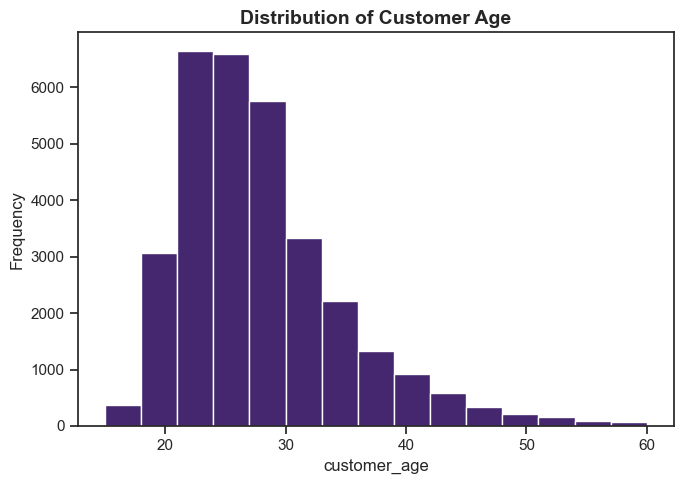

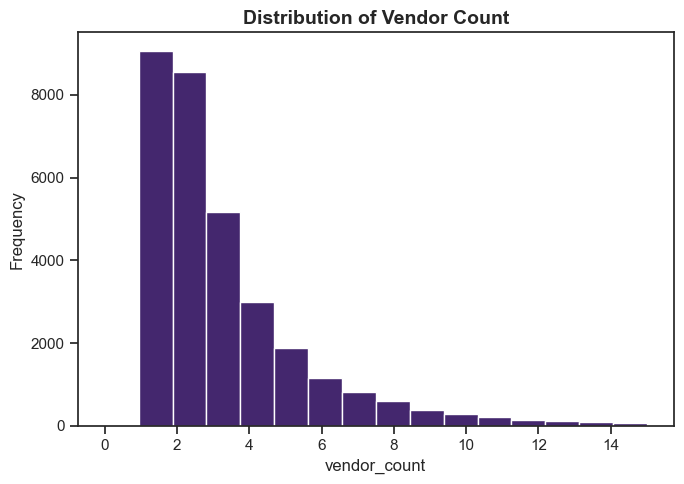

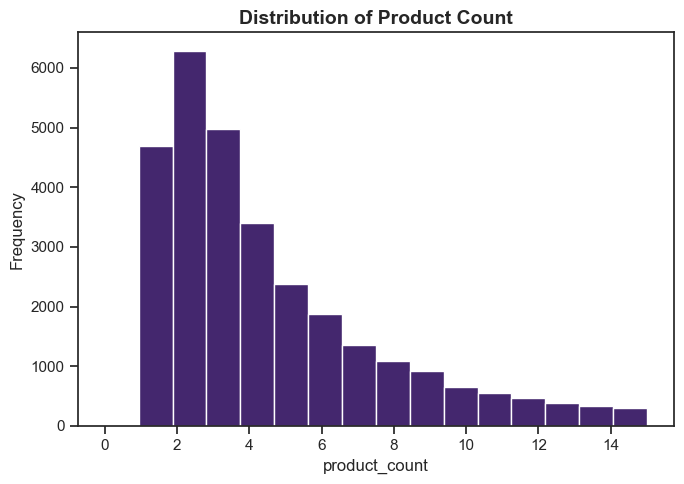

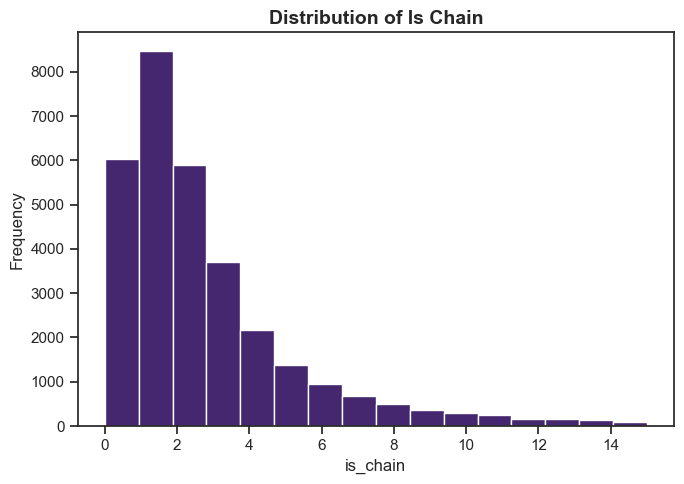

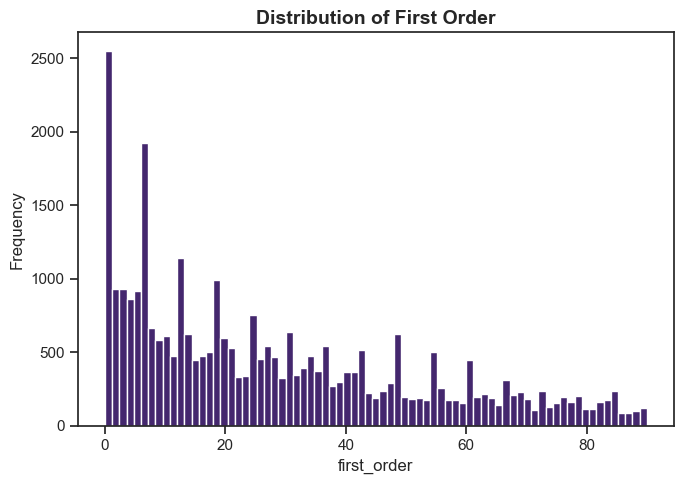

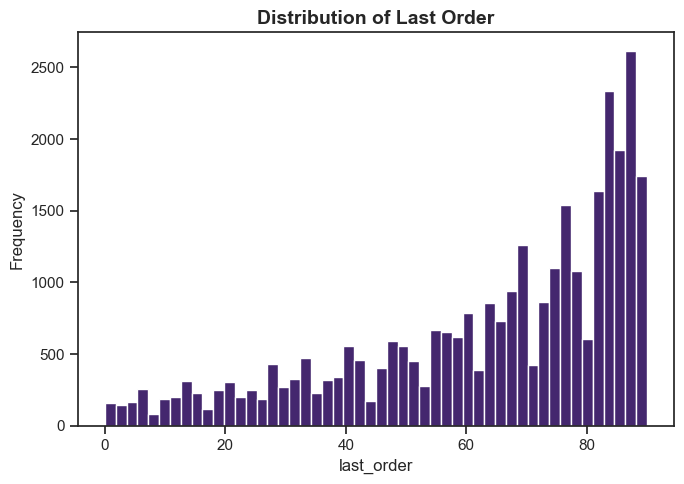

In [33]:
bin_config = dict([
    ('customer_age', 15),
    ('vendor_count', 16),
    ('product_count', 16),
    ('first_order', 75),
    ('last_order', 50),
    ('is_chain', 16),
])
range_config = dict([
    ('customer_age', (15, 60)),
    ('vendor_count', (0, 15)),
    ('product_count', (0, 15)),
    ('first_order', None),
    ('last_order', None),
    ('is_chain', (0, 15)),
])
sns.set_style('ticks')
for var in metric_variables:
    title = f'Distribution of {var.replace("_", " ").title()}'
    bins = bin_config.get(var,10)
    range_tuple = range_config.get(var, (df[var].min(), df[var].max()))
    create_histogram(df[var], title, var, 'Frequency', bins = bins, range=range_tuple)

In [34]:
#function to plot time distributions, both hours and days of week
def plot_time_distribution(df, time_cols, title, color='#44276e'):
    """
    Plot distribution for time-based columns with improved y-axis scaling.
    """
    counts = [df[col].sum() for col in time_cols]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(counts)), counts, color='#44276e')
    plt.title(title,fontsize=14, fontweight='bold')

    if len(counts) == 24:  # Hours
        plt.xlabel('Hour of Day')
        plt.xticks(range(24))
        # Set y-axis limits to focus on the meaningful range
        min_count = min(counts) * 0.9
        max_count = max(counts) * 1.1
        plt.ylim(min_count, max_count)
    elif len(counts) == 7:  # Days
        plt.xlabel('Day of Week (0 = Sunday, 6 = Saturday)')
        plt.xticks(range(7))
        # Set y-axis limits for days
        min_count = min(counts) * 0.95
        max_count = max(counts) * 1.05
        plt.ylim(min_count, max_count)

    plt.ylabel('Count')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

In [35]:
#function to plot cuisine types
def plot_cuisine_distribution(df, cuisine_columns, title='Distribution of Cuisine Types'):
    """
    Plot distribution of cuisine types with improved formatting.
    """
    cuisine_counts = [df[cuisine].sum() for cuisine in cuisine_columns]

    # Sort cuisines by count for better visualization
    sorted_indices = np.argsort(cuisine_counts)[::-1]
    sorted_counts = [cuisine_counts[i] for i in sorted_indices]
    sorted_cuisines = [cuisine_columns[i] for i in sorted_indices]

    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(sorted_cuisines)), sorted_counts, color='#44276e')
    plt.title(title,fontsize=14, fontweight='bold')
    plt.xlabel('Cuisine Type')
    plt.ylabel('Count')

    # Rotate labels and adjust their position
    plt.xticks(range(len(sorted_cuisines)),
               [cuisine.replace('CUI_', '').replace('_', ' ') for cuisine in sorted_cuisines],
               rotation=45,
               ha='right')

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')

    plt.grid(False)
    plt.tight_layout()
    plt.show()

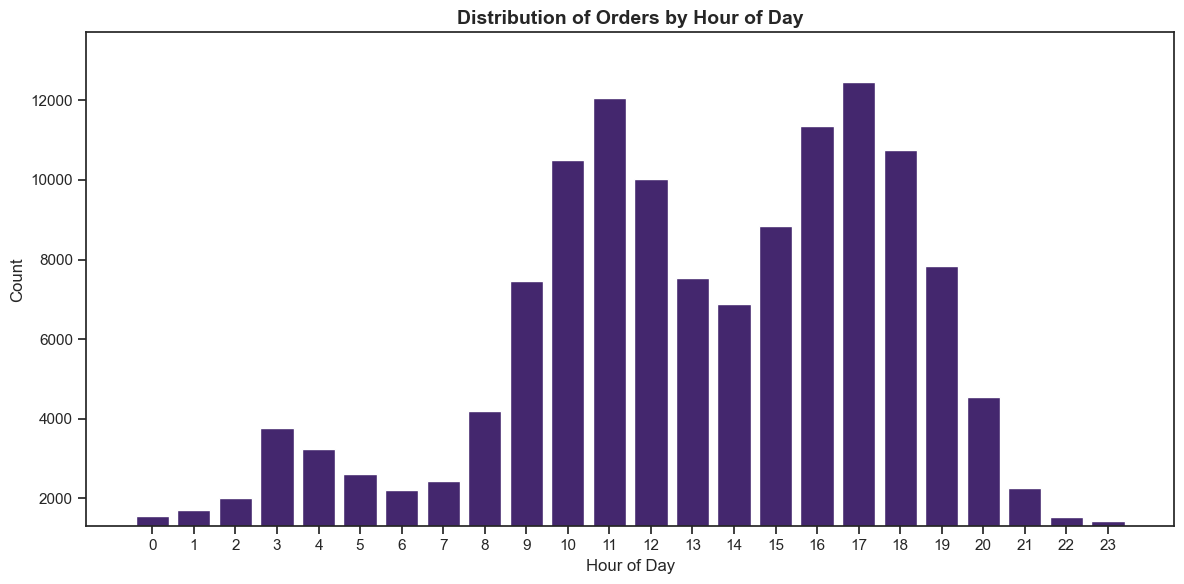

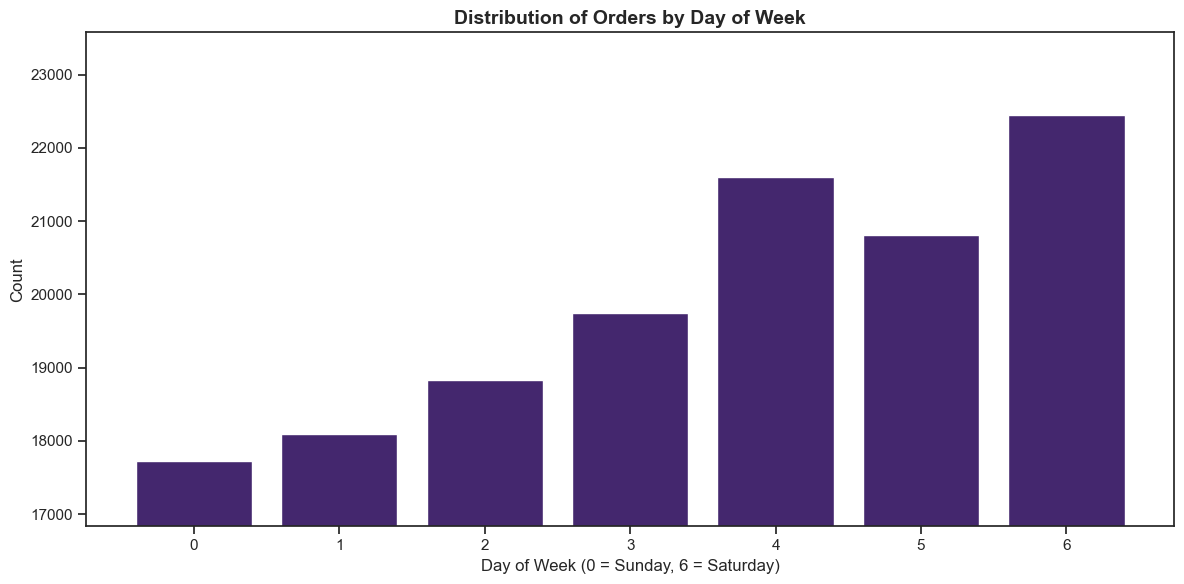

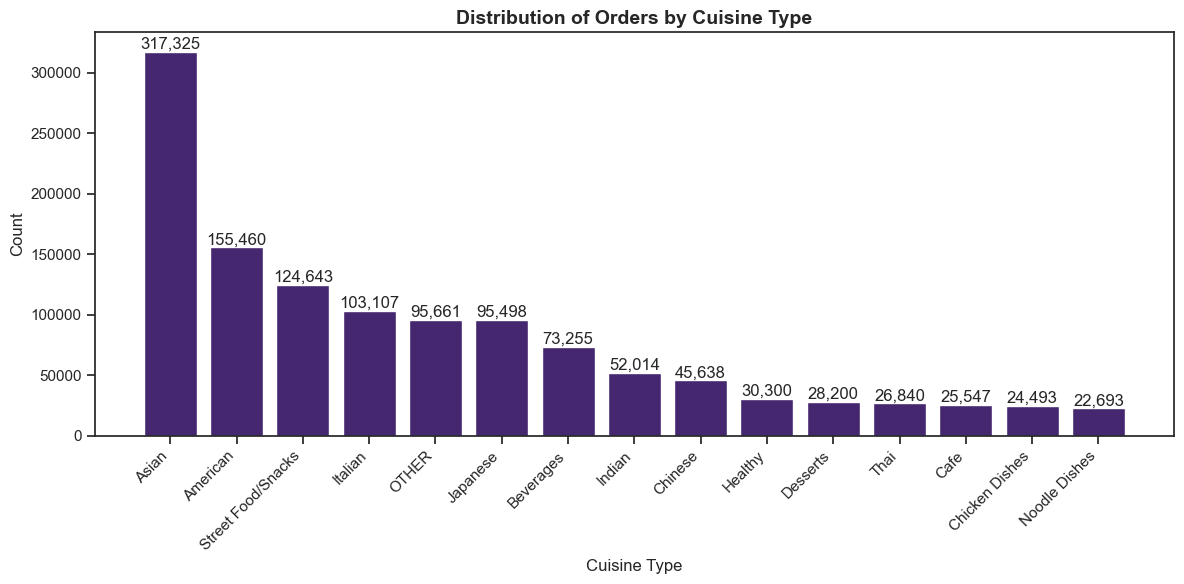

In [36]:
def visualize_all_distributions(df):
    """
    Create all visualizations for the dataset with optimized scaling.
    """    # Time-based distributions
    hour_cols = [f'HR_{i}' for i in range(24)]
    if all(col in df.columns for col in hour_cols):
        plot_time_distribution(df, hour_cols, 'Distribution of Orders by Hour of Day', '44276e')

    day_cols = [f'DOW_{i}' for i in range(7)]
    if all(col in df.columns for col in day_cols):
        plot_time_distribution(df, day_cols, 'Distribution of Orders by Day of Week', '44276e')

    # Cuisine distribution
    cuisine_cols = [col for col in df.columns if col.startswith('CUI_')]
    if cuisine_cols:
        plot_cuisine_distribution(df, cuisine_cols,'Distribution of Orders by Cuisine Type')

visualize_all_distributions(df)

### BoxPlots

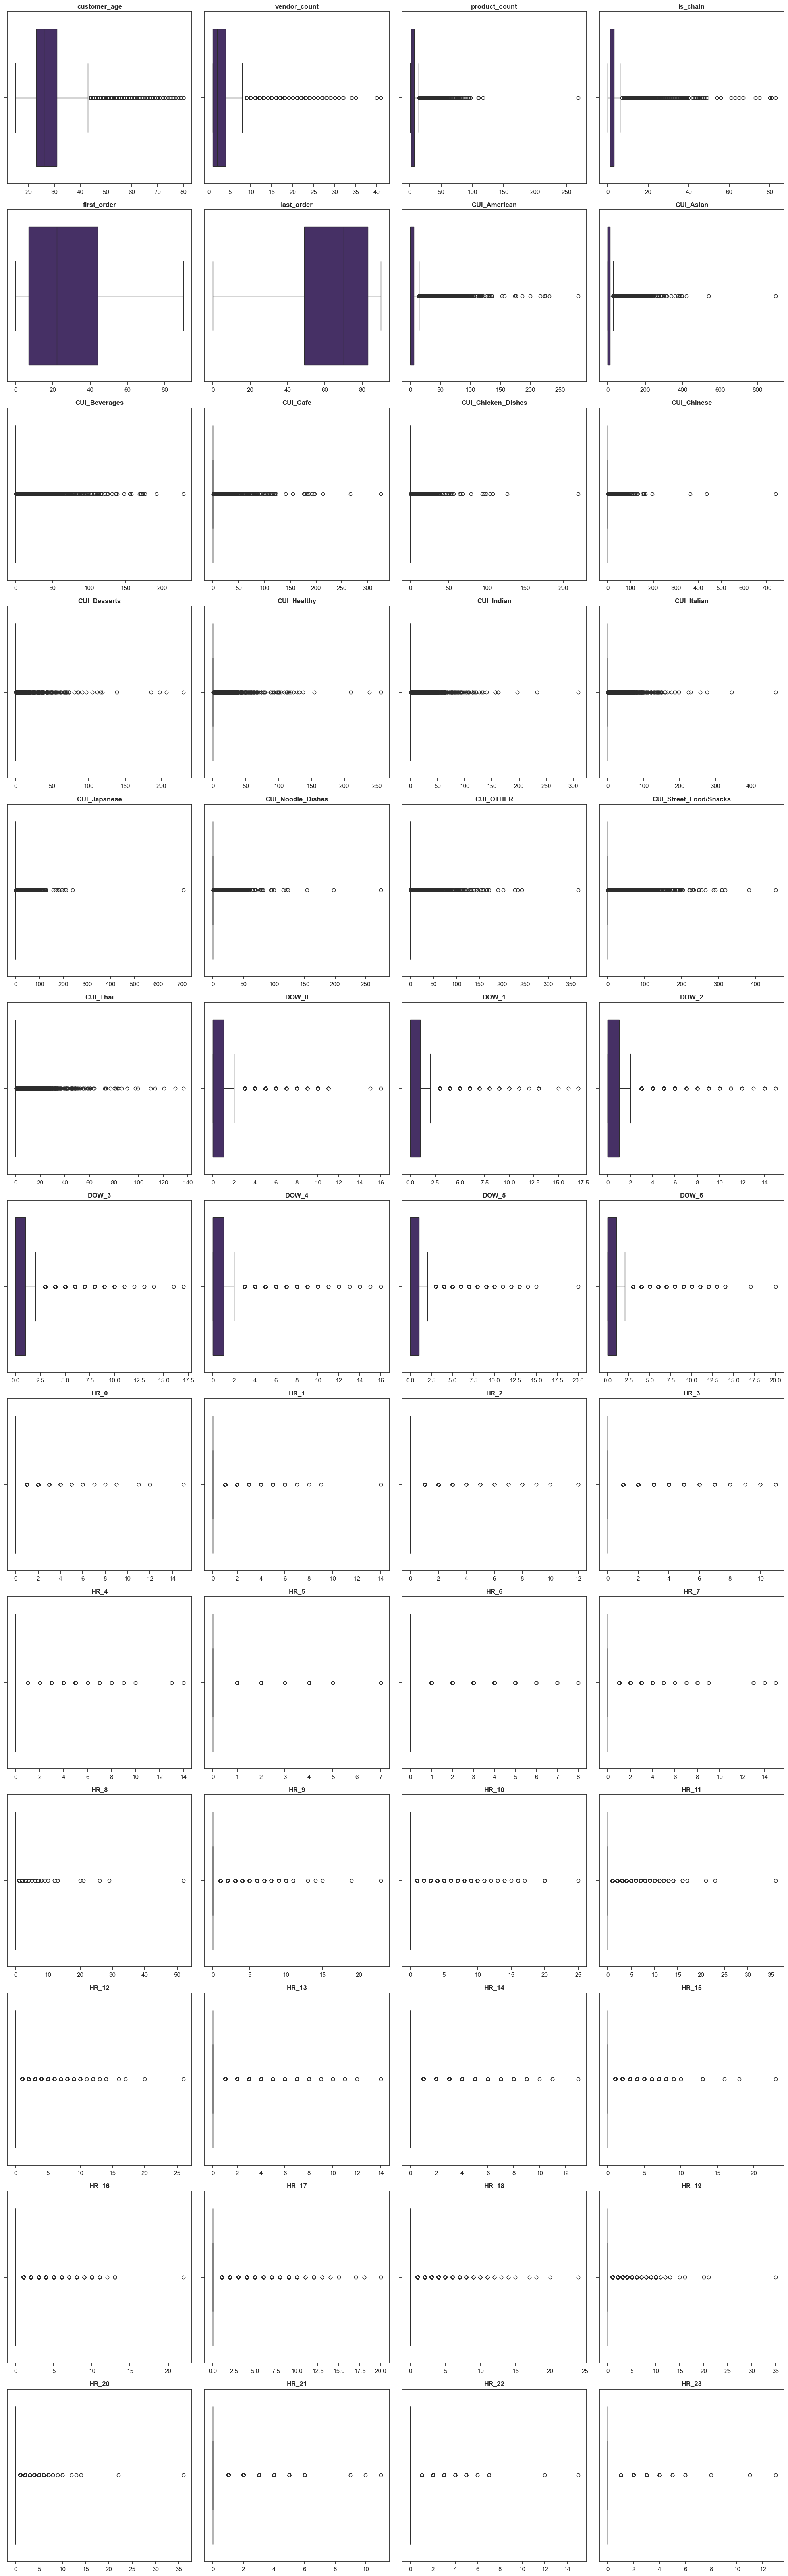

In [37]:
# Calculate the number of rows and columns for the subplots
n_vars = len(numeric_df.columns)
n_rows = (n_vars + 3) // 4  # 4 plots per row, rounded up
n_cols = min(n_vars, 4)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a boxplot for each numeric variable
for i, column in enumerate(numeric_df.columns):
    sns.boxplot(x=numeric_df[column], ax=axes[i], color = '#44276e')
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_xlabel('')

# Remove any unused subplots
for i in range(n_vars, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

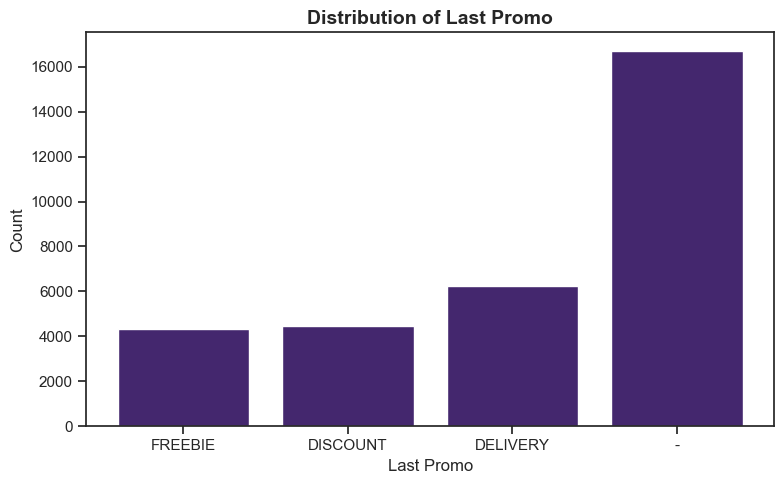

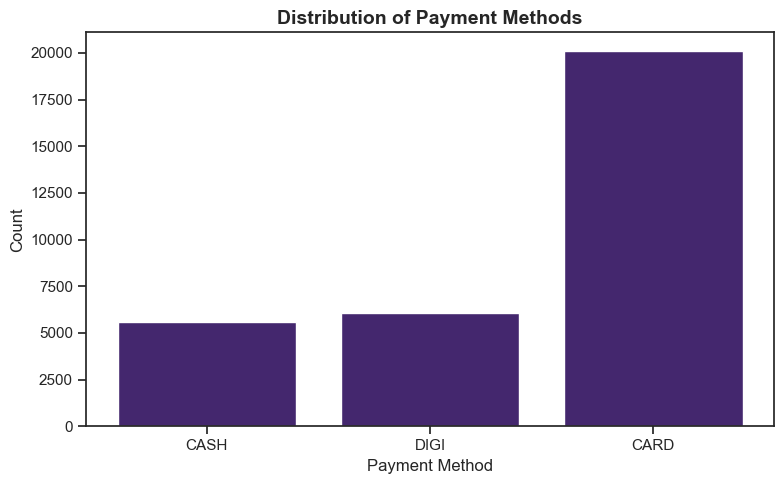

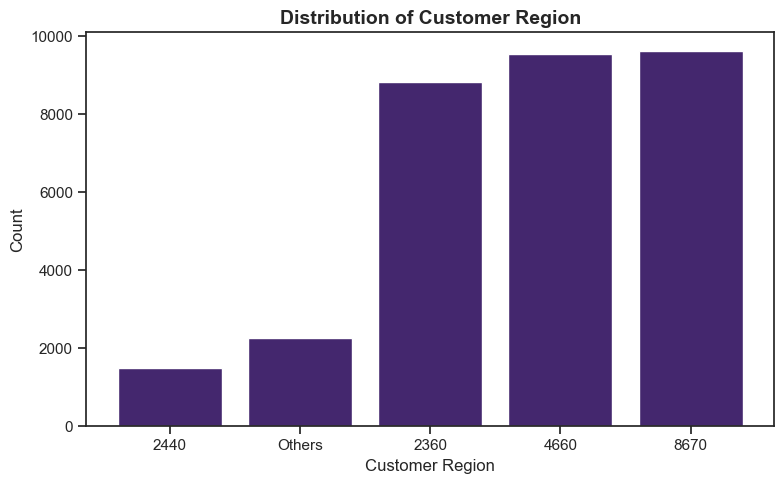

In [38]:
# Set style to 'ticks' with a white background
sns.set_style('ticks')

# Bar chart for last_promo
last_promo_counts = df['last_promo'].value_counts().sort_values(ascending=True)  # Sort in ascending order

plt.figure(figsize=(8, 5))
plt.bar(last_promo_counts.index.astype(str), last_promo_counts.values, color='#44276e')
plt.title('Distribution of Last Promo', fontweight='bold', fontsize=14)
plt.xlabel('Last Promo', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Bar chart for payment method
payment_methods = ['DIGI', 'CASH', 'CARD']
payment_counts = [df[df['payment_method'] == method].shape[0] for method in payment_methods]
payment_methods, payment_counts = zip(*sorted(zip(payment_methods, payment_counts), key=lambda x: x[1]))  # Sort by count

plt.figure(figsize=(8, 5))
plt.bar(payment_methods, payment_counts, color='#44276e')
plt.title('Distribution of Payment Methods', fontweight='bold', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

# Bar chart for customer_region
customer_region_counts = df['customer_region'].value_counts()
threshold = 0.04
others_value = customer_region_counts[customer_region_counts / sum(customer_region_counts) < threshold].sum()
customer_region_counts = customer_region_counts[customer_region_counts / sum(customer_region_counts) >= threshold]
customer_region_counts.loc['Others'] = others_value
customer_region_counts = customer_region_counts.sort_values(ascending=True)  # Sort in ascending order

plt.figure(figsize=(8, 5))
plt.bar(customer_region_counts.index.astype(str), customer_region_counts.values, color='#44276e')
plt.title('Distribution of Customer Region', fontweight='bold', fontsize=14)
plt.xlabel('Customer Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

### Correlation Matrix

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/2688407335.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr_metric.applymap(lambda x: x if abs(x) > 0.5 else "")


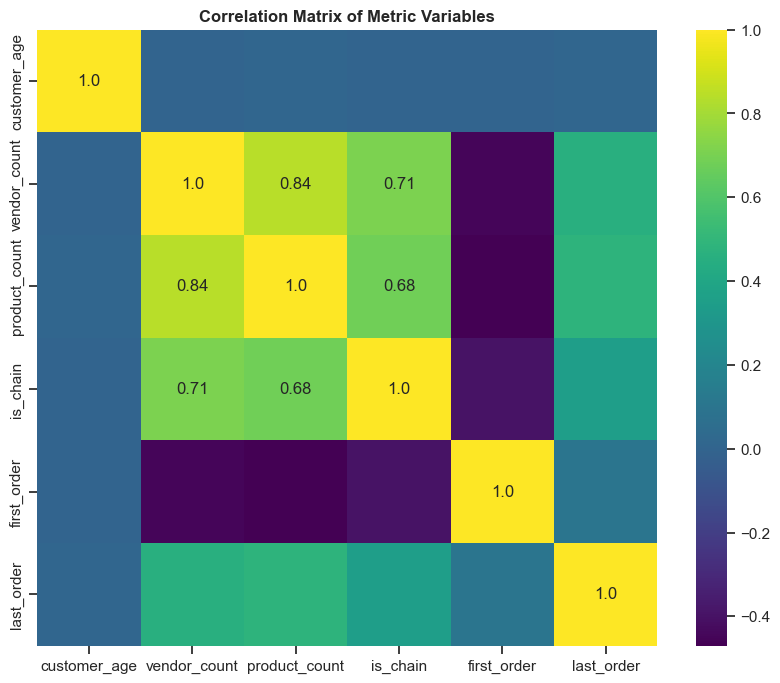

In [39]:
corr_metric = metric_variables.corr(method = 'spearman').round(2)

# Create a mask for annotations: only show values where abs(correlation) > 0.5
mask = corr_metric.applymap(lambda x: x if abs(x) > 0.5 else "")

plt.figure(figsize=(10,8))
plt.title('Correlation Matrix of Metric Variables', fontsize = '12', fontweight='bold')
sns.heatmap(data = corr_metric, annot = mask, cmap = plt.cm.viridis, fmt='.2')
plt.show()

- `customer_age` no correlation with other metric variables
- `vendor_count` high correlation with `product_count` and medium correlation with `is_chain`, `first_order`, and `last_order`
- `product count` high correlation with `vendor_count` and medium correlation with `is_chain`, `first_order`, and `last_order`
- `is_chain` medium correlation with `vendor_count`, `product_count`, `first_order`, and `last_order`
- `first_order` medium correlation with `vendor_count`, `product_count`, `is_chain`
- `last_order` medium correlation with `vendor_count`, `product_count`, `is_chain`

## Bivariate Analysis

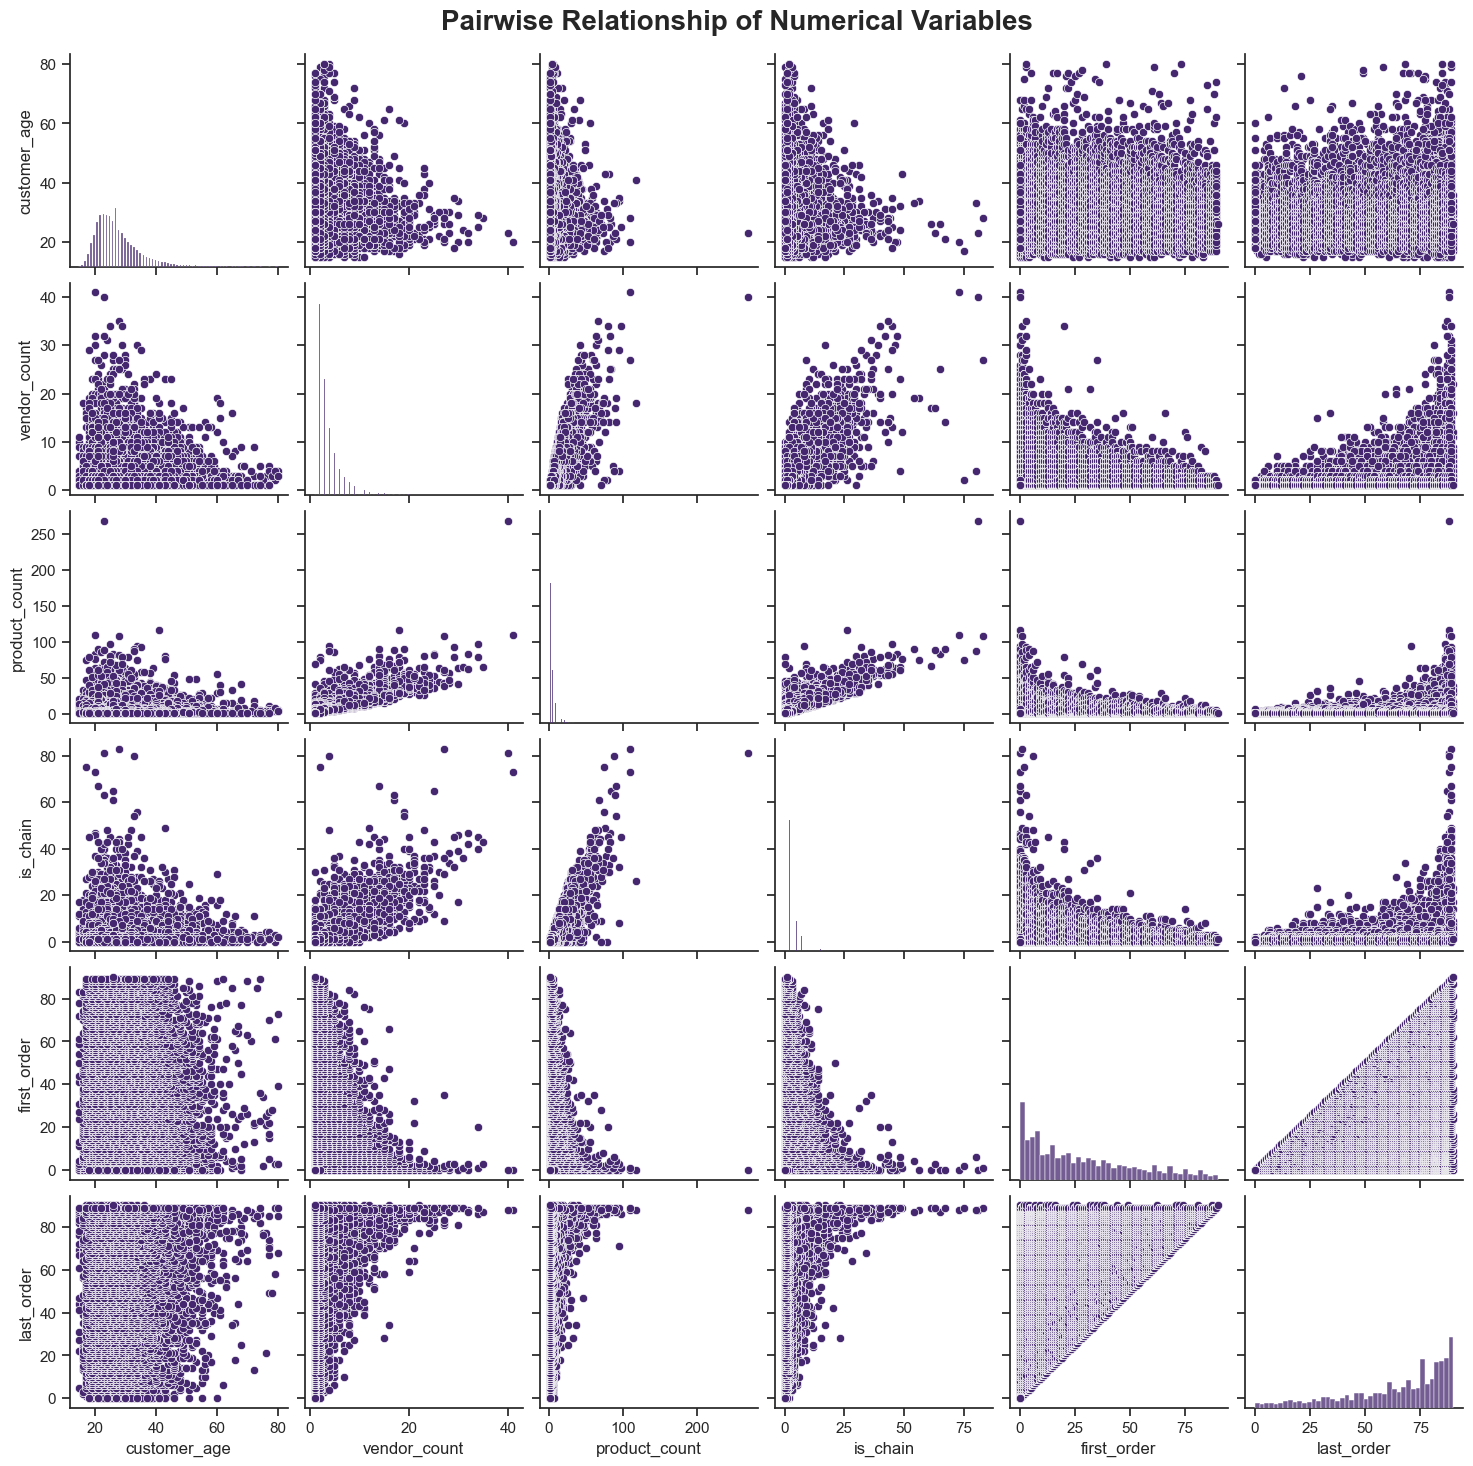

In [40]:
# Pairwise Relationship of Numerical Variables
sns.set(style='ticks')

sns.pairplot(metric_variables, diag_kind="hist", plot_kws={'color': '#44276e'},diag_kws={'color': '#44276e'})

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20, fontweight='bold')

plt.show()

<hr>
<a class="anchor" id="newfeature">
    
## 4.3 New Feature Creation
    
</a>

#### Total Orders Per Client

In [41]:
# Sum up orders across week to get total orders per client
df['Total_Orders'] = df.iloc[:, 24:31].sum(axis=1)

#### Total Spent Per Client

In [42]:
df['Total_Spent'] = cuisines.sum(axis=1)

#### Amount Spent Per Order

In [43]:
df['Spent_Per_Order'] = (df['Total_Spent']/df['Total_Orders']).round(2)

#### Amount of Items Per Order

In [44]:
df['Items_Per_Order'] = (df['product_count']/df['Total_Orders'])

#### Frequency

In [45]:
#i think we cannot calculate it like this
df['Frequency'] = (df['Total_Orders']/(df['last_order']-df['first_order']+1))

In [46]:
# check 'frq' column
df['Frequency'].describe()

count    31737.000000
mean         0.354685
std          0.414692
min          0.022222
25%          0.076923
50%          0.134328
75%          0.600000
max          4.000000
Name: Frequency, dtype: float64

#### Loyalty

In [47]:
# we callculate loyalty score to understand clients preferences for vendors
df['Loyalty'] = (df['Total_Orders']-df['vendor_count'])/df['Total_Orders']

#### Time with us

In [48]:
df['Time_with_us'] = df['last_order'] - df['first_order']

#### Cuisine Diversity

In [49]:
df['CUI_diversity'] = cuisines.apply(lambda row: sum(row != 0), axis='columns')

#### Time Periods

In [50]:
# 3 different time periods based on the order distribution throughout the day (3 peak hours)
time_periods = {
        'Night': ['HR_21','HR_22', 'HR_23','HR_0', 'HR_1', 'HR_2', 'HR_3','HR_4', 'HR_5','HR_6','HR_7'], 
        'Day': ['HR_8', 'HR_9', 'HR_10','HR_11','HR_12', 'HR_13', 'HR_14',],    
        'Dinner': ['HR_15', 'HR_16','HR_17','HR_18','HR_19','HR_20']       
    }
# split the data into 4 different time periods
for period, hours in time_periods.items():
    df[period] = df[hours].sum(axis=1)


In [51]:
# check how many orders for each time period
df[['Night', 'Day', 'Dinner']].sum()

Night     24816
Day       58653
Dinner    55794
dtype: int64

In [52]:
# group days of week into weekdays and weekends
df['Weekdays'] = df[['DOW_1', 'DOW_2', 'DOW_3', 'DOW_4']].sum(axis=1) 
df['Weekends'] = df[['DOW_5', 'DOW_6', 'DOW_0']].sum(axis=1) # counting Friday (DOW_5) as weekend

In [53]:
# count orders in weekends and weekdays
df[['Weekdays', 'Weekends']].sum()

Weekdays    78277
Weekends    60986
dtype: int64

#### Age Groups

In [54]:
# Age grouping
age_bins = [0, 23, 28, 35,float('inf')]  # Use float('inf') for open-ended upper limit
age_labels = ['<23', '23-27', '28-34', '35+']
df['Age_Group'] = pd.cut(df['customer_age'], bins=age_bins, labels=age_labels)

In [55]:
# check how many people in each age group
df['Age_Group'].value_counts()

Age_Group
23-27    10855
<23      10074
28-34     7049
35+       3759
Name: count, dtype: int64

In [56]:
# Couisines grouping
# Grouping cuisines into categories
cuisine_categories = {
    'Asian': ['CUI_Asian', 'CUI_Indian', 'CUI_Thai', 'CUI_Chinese', 'CUI_Japanese'],
    'Western': ['CUI_American', 'CUI_Street_Food/Snacks','CUI_Italian',],
    'Drinks_desserts': ['CUI_Beverages', 'CUI_Cafe','CUI_Desserts'],
    'Specific_other':['CUI_Healthy','CUI_Chicken_Dishes', 'CUI_Noodle_Dishes', 'CUI_OTHER']
}
# Create a new column for each cuisine category
for category, cuisines in cuisine_categories.items():
    df[category] = df[cuisines].sum(axis=1)

In [57]:
# Check how much was spend on each cuisine category
df[['Asian', 'Western', 'Drinks_desserts', 'Specific_other']].sum()

Asian              537316.75
Western            383211.61
Drinks_desserts    127003.81
Specific_other     173148.27
dtype: float64

Had to make a decision to merge the cuisines into 4 group since Asian was dominating the clusters. Pros: Better clusters, Cons: Less specific recommendations

#### Cuisine Proportions
In order to get preference distribution, independent of the monetary values, I will calculate the proportion of spending on each cuisine relative to the total spending on all cuisines 

In [58]:
# Create a new column for each cuisine category
for category, cuisines in cuisine_categories.items():
    df[category] = df[cuisines].sum(axis=1)

# Proportions of each category relative to total spent across all categories
df['Total_Spent'] = df[list(cuisine_categories.keys())].sum(axis=1)

for category in cuisine_categories.keys():
    df[f'{category}_Proportion'] = df[category] / df['Total_Spent']

# Display the resulting DataFrame
df[['Total_Spent', 'Asian', 'Western','Drinks_desserts', 'Specific_other', 'Asian_Proportion', 'Western_Proportion', 'Drinks_desserts_Proportion', 'Specific_other_Proportion']].head()

Total_Spent  Asian  Western  Drinks_desserts  Specific_other  \
0        28.88  28.88     0.00              0.0             0.0   
1        19.21   6.39    12.82              0.0             0.0   
2         9.20   0.00     9.20              0.0             0.0   
3        31.56  31.56     0.00              0.0             0.0   
4        55.44  40.87    14.57              0.0             0.0   

   Asian_Proportion  Western_Proportion  Drinks_desserts_Proportion  \
0          1.000000            0.000000                         0.0   
1          0.332639            0.667361                         0.0   
2          0.000000            1.000000                         0.0   
3          1.000000            0.000000                         0.0   
4          0.737193            0.262807                         0.0   

   Specific_other_Proportion  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0

If two cuisines are ordered one might dominate if more money was spent on it, which is not a bad thing because we want to encourage customer spending

In [59]:
# Cuisine diversity based on buckets of cuisine categories
df['CUI_cat_diversity'] = df[list(cuisine_categories.keys())].apply(lambda row: sum(row != 0), axis=1)

In [60]:
# show first rows of cui_cat_diversity and cuisine categories
df[['CUI_cat_diversity', 'Asian', 'Western', 'Drinks_desserts', 'Specific_other']].head()

CUI_cat_diversity  Asian  Western  Drinks_desserts  Specific_other
0                  1  28.88     0.00              0.0             0.0
1                  2   6.39    12.82              0.0             0.0
2                  1   0.00     9.20              0.0             0.0
3                  1  31.56     0.00              0.0             0.0
4                  2  40.87    14.57              0.0             0.0

#### Used Promo

In [61]:
# create a new binary variable, indicating whether the client has ordered using promo code or not
df['Promo'] = df['last_promo'].apply(lambda x: 1 if x != '-' else 0)

In [62]:
# How many customers used promo code and how many didnt
df['Promo'].value_counts()

Promo
0    16693
1    15044
Name: count, dtype: int64

#### Add new variables to existing groups 

In [63]:
new_metric = df[['Total_Orders', 'Total_Spent', 'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'CUI_diversity','CUI_cat_diversity', 'Loyalty', 'Time_with_us']]
#add new_metric to metric_variables
metric_variables = pd.concat([metric_variables, new_metric], axis=1)
metric_variables.columns

Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'Total_Orders', 'Total_Spent',
       'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'CUI_diversity',
       'CUI_cat_diversity', 'Loyalty', 'Time_with_us'],
      dtype='object')

<hr>
<a class="anchor" id="newvis">
    
## 4.4 New Feature Visualizations
    
</a>

In [64]:
new_variables = ['Total_Orders', 'Total_Spent', 'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'CUI_diversity','CUI_cat_diversity','Loyalty', 'Time_with_us','Night', 'Day', 'Dinner', 'Age_Group', 'Asian', 'Western','Drinks_desserts', 'Specific_other']
df[new_variables].describe().T

count       mean        std       min        25%  \
Total_Orders       31737.0   4.388033   5.087637  1.000000   2.000000   
Total_Spent        31737.0  38.462376  46.442549  0.370000  13.020000   
Spent_Per_Order    31737.0  10.305976   7.862201  0.370000   5.070000   
Items_Per_Order    31737.0   1.302127   0.430260  1.000000   1.000000   
Frequency          31737.0   0.354685   0.414692  0.022222   0.076923   
CUI_diversity      31737.0   2.285156   1.480498  1.000000   1.000000   
CUI_cat_diversity  31737.0   1.791159   0.854078  1.000000   1.000000   
Loyalty            31737.0   0.161804   0.229567  0.000000   0.000000   
Time_with_us       31737.0  35.450610  29.408980  0.000000   3.000000   
Night              31737.0   0.781926   1.660911  0.000000   0.000000   
Day                31737.0   1.848095   2.909627  0.000000   0.000000   
Dinner             31737.0   1.758011   2.842715  0.000000   0.000000   
Asian              31737.0  16.930294  29.454222  0.000000   0.000000   
Western            31737.0  12.074601  22.898232  0.000000   0.000000   
Drinks_desserts    31737.0   4.001759  12.042046  0.000000   0.000000   
Specific_other     31737.0   5.455723  13.699302  0.000000   0.000000   

                         50%        75%          max  
Total_Orders        3.000000   5.000000    94.000000  
Total_Spent        24.200000  45.180000  1418.330000  
Spent_Per_Order     8.220000  12.920000   104.320000  
Items_Per_Order     1.166667   1.500000     6.000000  
Frequency           0.134328   0.600000     4.000000  
CUI_diversity       2.000000   3.000000    13.000000  
CUI_cat_diversity   2.000000   2.000000     4.000000  
Loyalty             0.000000   0.333333     0.973333  
Time_with_us       34.000000  62.000000    90.000000  
Night               0.000000   1.000000    39.000000  
Day                 1.000000   2.000000    60.000000  
Dinner              1.000000   2.000000    60.000000  
Asian               7.110000  21.850000  1003.430000  
Western             2.900000  14.920000   468.330000  
Drinks_desserts     0.000000   1.020000   326.100000  
Specific_other      0.000000   5.920000   366.080000

### Histograms

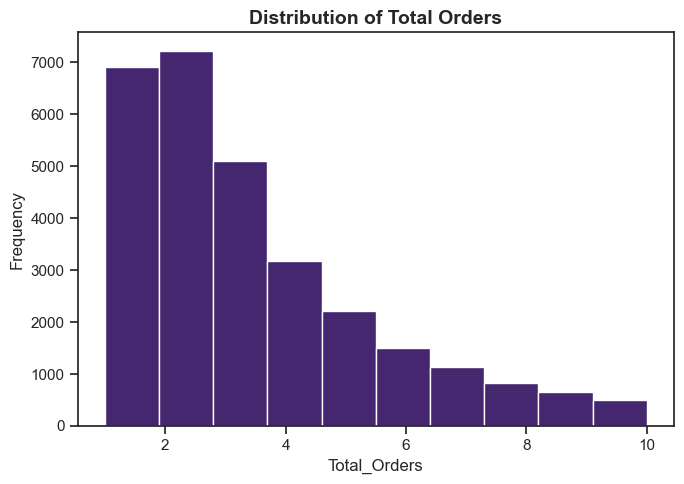

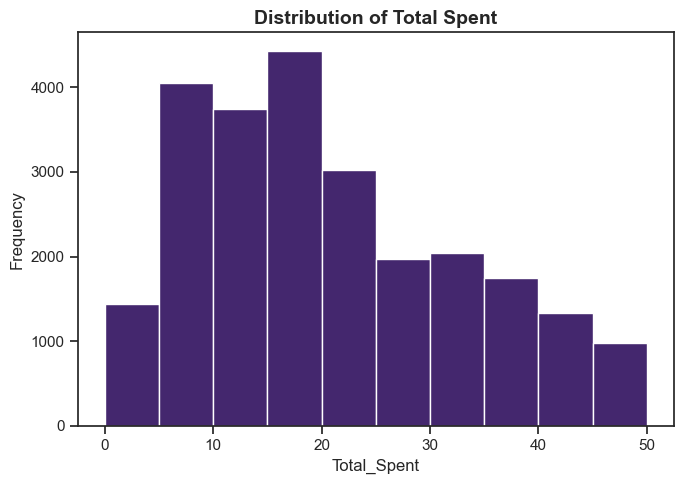

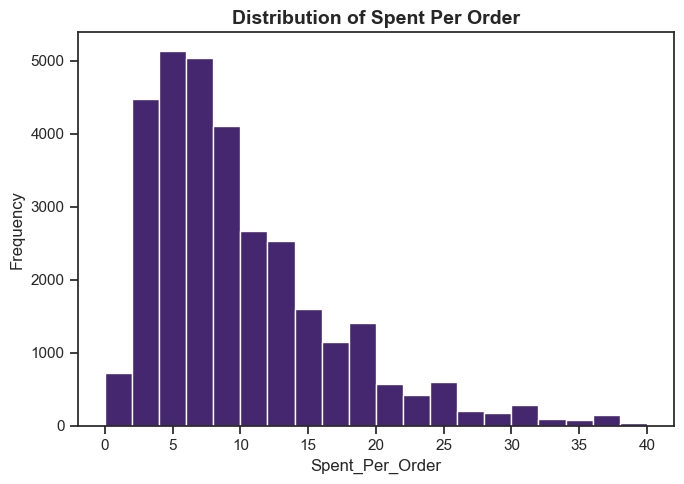

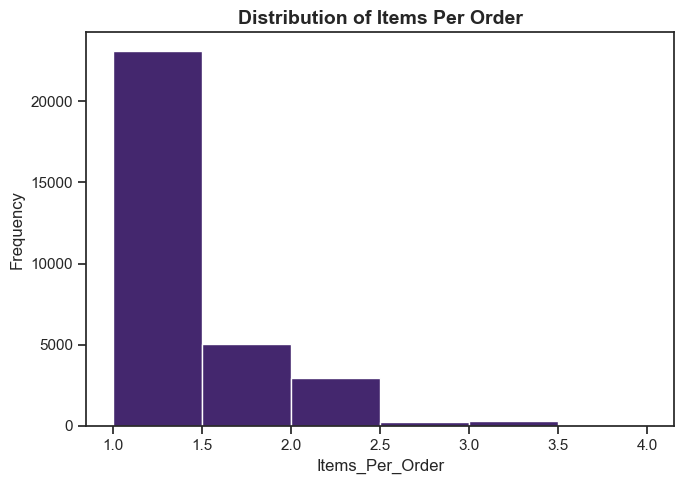

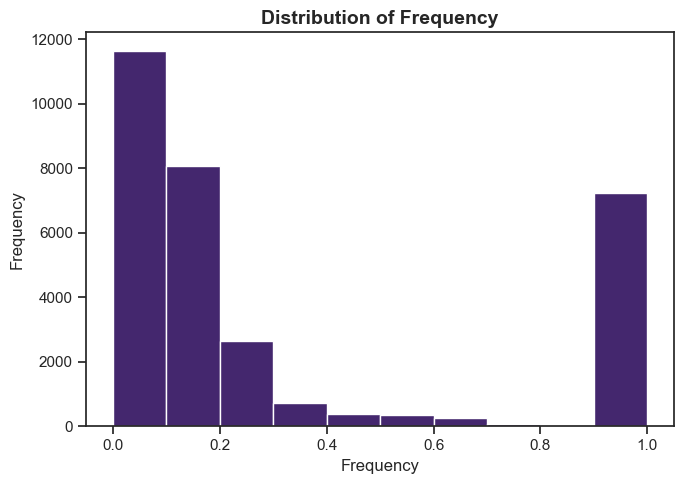

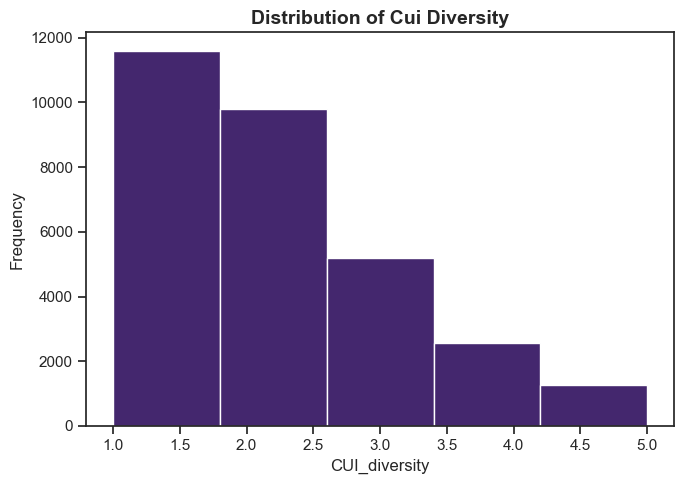

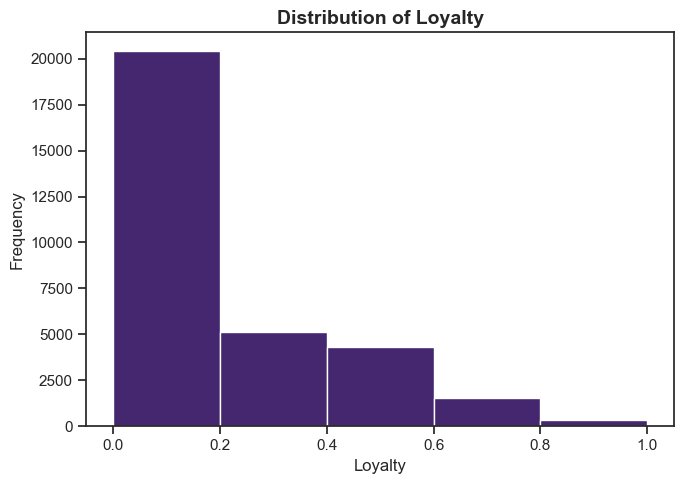

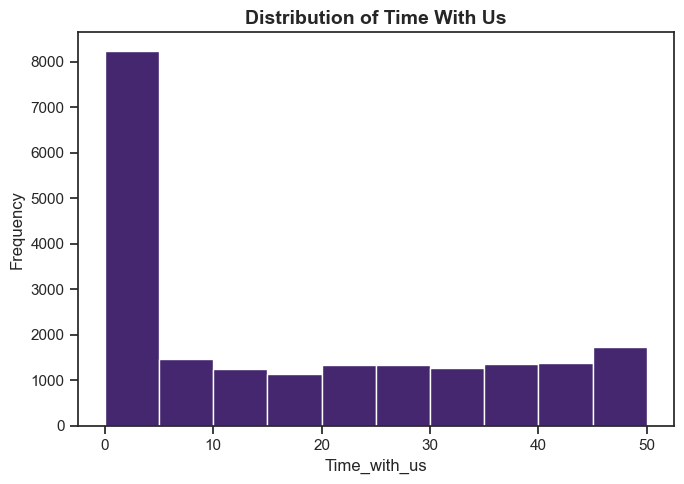

In [65]:
new_to_plot = ['Total_Orders', 'Total_Spent', 'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'CUI_diversity', 'Loyalty', 'Time_with_us']
bin_config = {
    'Total_Orders': 10,
    'Total_Spent': 10,
    'Spent_Per_Order': 20,
    'Items_Per_Order': 6,
    'Frequency': 10,
    'CUI_diversity': 5,
    'Loyalty': 5,
    'Time_with_us': 10,
}


range_config = {
    'Total_Orders': (1, 10),
    'Total_Spent': (0, 50),
    'Spent_Per_Order': (0, 40),
    'Items_Per_Order': (1, 4),
    'Frequency': (0, 1),
    'CUI_diversity': (1, 5),
    'Loyalty': (0, 1),
    'Time_with_us': (0, 50),
}

# Set the style for Seaborn plots
sns.set_style('ticks')
for var in new_to_plot:
    title = f'Distribution of {var.replace("_", " ").title()}'
    bins = bin_config.get(var,50)
    range_tuple = range_config.get(var, (df[var].min(), df[var].max()))
    create_histogram(df[var], title, var, 'Frequency', bins = bins, range=range_tuple, color='#44276e')

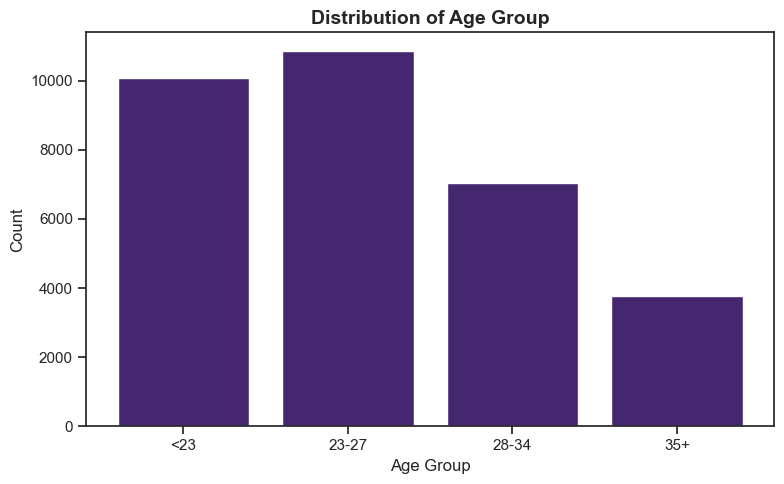

In [66]:
# Ensure Age_Group is ordered correctly
age_group_order = ['<23', '23-27', '28-34', '35+']
df['Age_Group'] = pd.Categorical(df['Age_Group'], categories=age_group_order, ordered=True)

# Count occurrences of each Age Group
age_group_counts = df['Age_Group'].value_counts().reindex(age_group_order)

# Plot Age Group
plt.figure(figsize=(8, 5))
plt.bar(age_group_counts.index, age_group_counts.values, color='#44276e', edgecolor=None)
plt.title('Distribution of Age Group', fontweight='bold', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

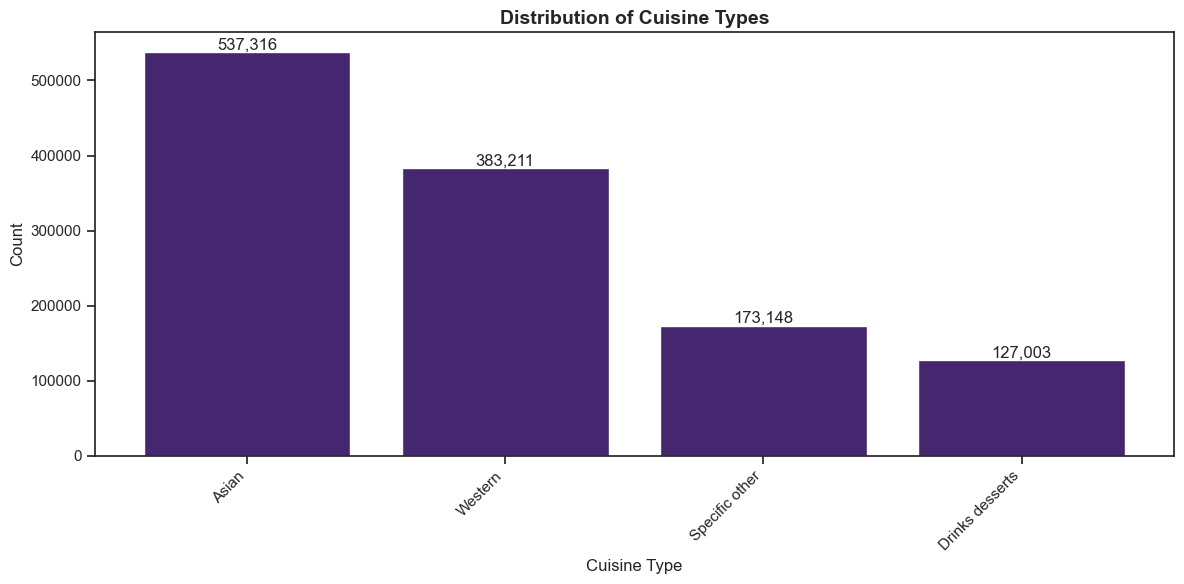

In [67]:
# frequency of each cuisine type
plot_cuisine_distribution(df, ['Asian', 'Western', 'Drinks_desserts', 'Specific_other'])

In [68]:
# values for Asian, Western, Drinks_desserts, Specific_other
df[['Asian', 'Western', 'Drinks_desserts', 'Specific_other']].sum()

Asian              537316.75
Western            383211.61
Drinks_desserts    127003.81
Specific_other     173148.27
dtype: float64

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/1184061244.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = df.groupby('Age_Group').sum(numeric_only=True)


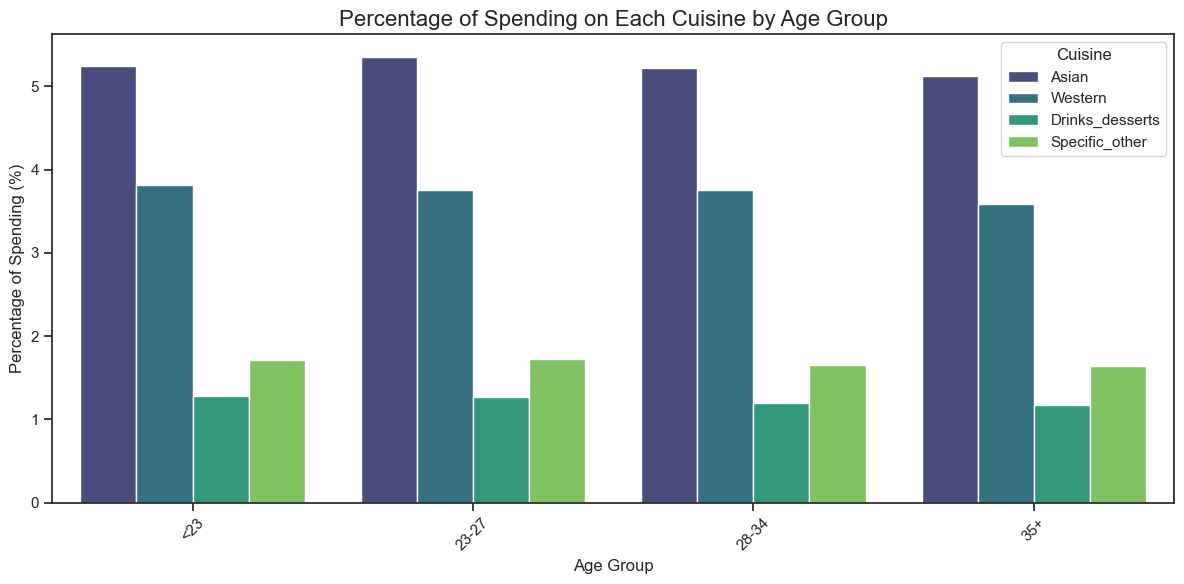

In [69]:
# Step 1: Calculate total spending for each age group
age_group_totals = df.groupby('Age_Group').sum(numeric_only=True)

# Step 2: Calculate the percentage of spending on each cuisine
age_group_percentages = age_group_totals.div(age_group_totals.sum(axis=1), axis=0) * 100

# Step 3: Reset index to have Age_Group as a column
age_group_percentages.reset_index(inplace=True)

# Step 4: Melt the DataFrame for easier plotting
melted_df = age_group_percentages.melt(id_vars='Age_Group', 
                                        value_vars=['Asian', 'Western', 'Drinks_desserts', 'Specific_other'],
                                        var_name='Cuisine', 
                                        value_name='Percentage')

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Age_Group', y='Percentage', hue='Cuisine',palette = 'viridis')

# Layout
plt.title("Percentage of Spending on Each Cuisine by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Spending (%)", fontsize=12)
plt.legend(title='Cuisine')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/480888325.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = df.groupby('Age_Group')[['Weekdays', 'Weekends']].sum()


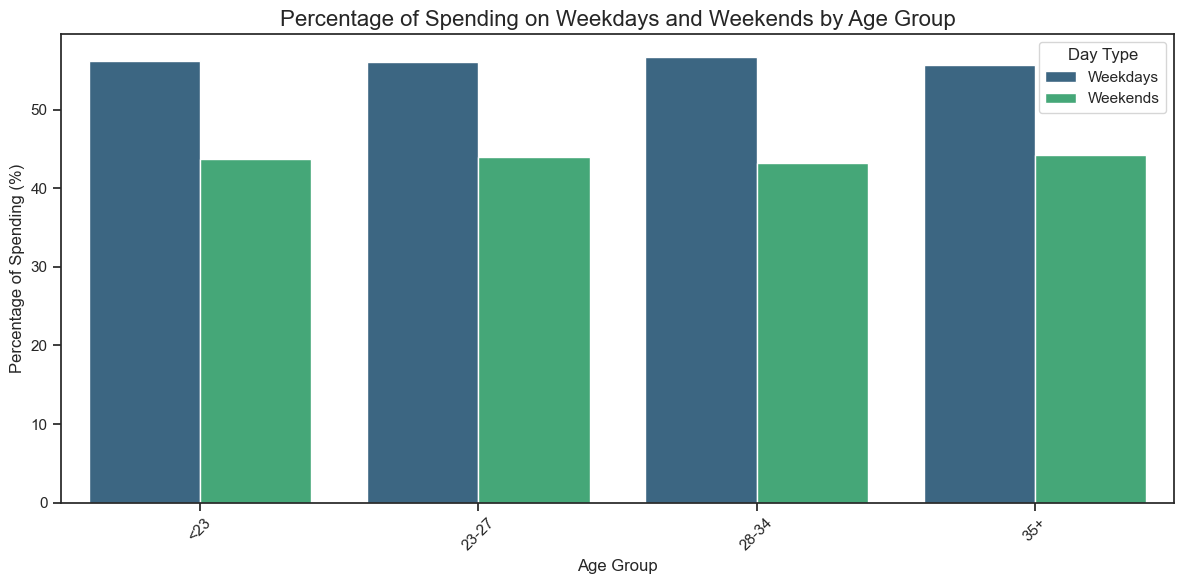

In [70]:
# Step 1: Calculate total spending for each age group
age_group_totals = df.groupby('Age_Group')[['Weekdays', 'Weekends']].sum()

# Step 2: Calculate the percentage of spending on weekdays and weekends
age_group_percentages = age_group_totals.div(age_group_totals.sum(axis=1), axis=0) * 100

# Step 3: Reset index to have Age_Group as a column
age_group_percentages.reset_index(inplace=True)

# Step 4: Melt the DataFrame for easier plotting
melted_df = age_group_percentages.melt(id_vars='Age_Group', 
                                        value_vars=['Weekdays', 'Weekends'],
                                        var_name='Day_Type', 
                                        value_name='Percentage')

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Age_Group', y='Percentage', hue='Day_Type',palette = 'viridis')

# Layout
plt.title("Percentage of Spending on Weekdays and Weekends by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Spending (%)", fontsize=12)
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/2174742645.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_totals = df.groupby('Age_Group')[['Night', 'Day', 'Dinner']].sum()


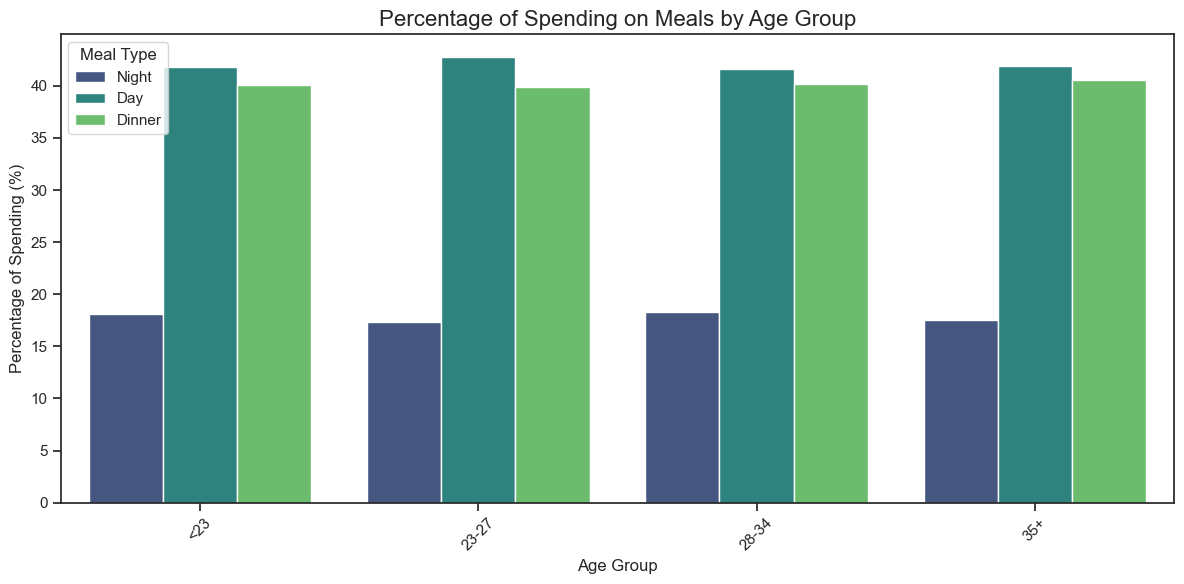

In [71]:
# Step 1: Calculate total spending for each age group
age_group_totals = df.groupby('Age_Group')[['Night', 'Day', 'Dinner']].sum()

# Step 2: Calculate the percentage of spending on each meal type
age_group_percentages = age_group_totals.div(age_group_totals.sum(axis=1), axis=0) * 100

# Step 3: Reset index to have Age_Group as a column
age_group_percentages.reset_index(inplace=True)

# Step 4: Melt the DataFrame for easier plotting
melted_df = age_group_percentages.melt(id_vars='Age_Group', 
                                        value_vars=['Night', 'Day', 'Dinner'],
                                        var_name='Meal_Type', 
                                        value_name='Percentage')

# Step 5: Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Age_Group', y='Percentage', hue='Meal_Type', palette = 'viridis')

# Layout
plt.title("Percentage of Spending on Meals by Age Group", fontsize=16)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Spending (%)", fontsize=12)
plt.legend(title='Meal Type')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/277049956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Asian_Proportion', palette = 'viridis')
/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/277049956.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Western_Proportion', palette = 'viridis')
/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/277049956.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Age_Group', y='Dri

<Axes: xlabel='Age_Group', ylabel='Specific_other_Proportion'>

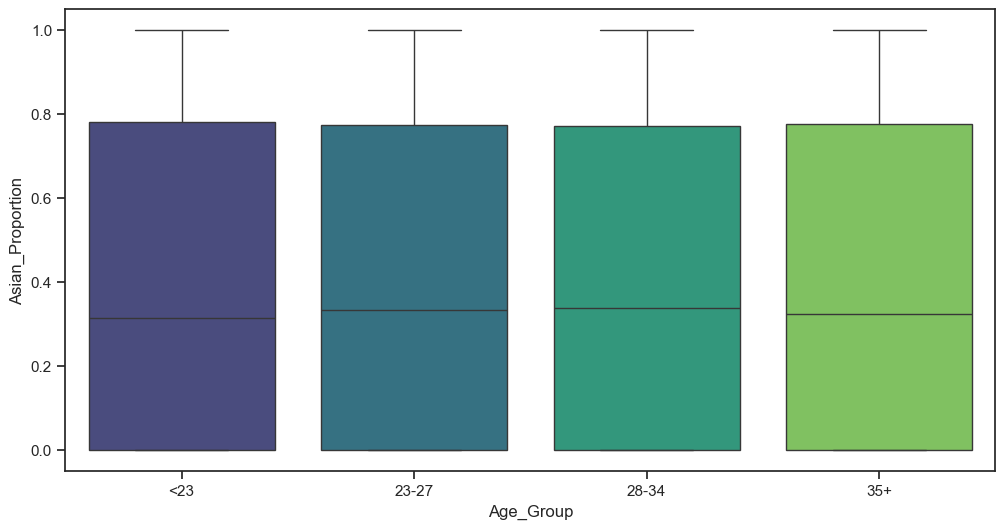

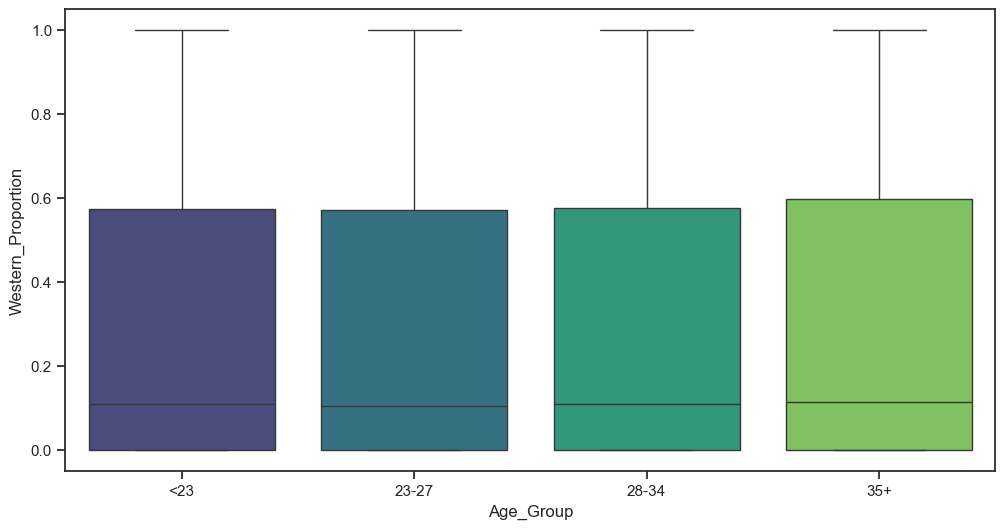

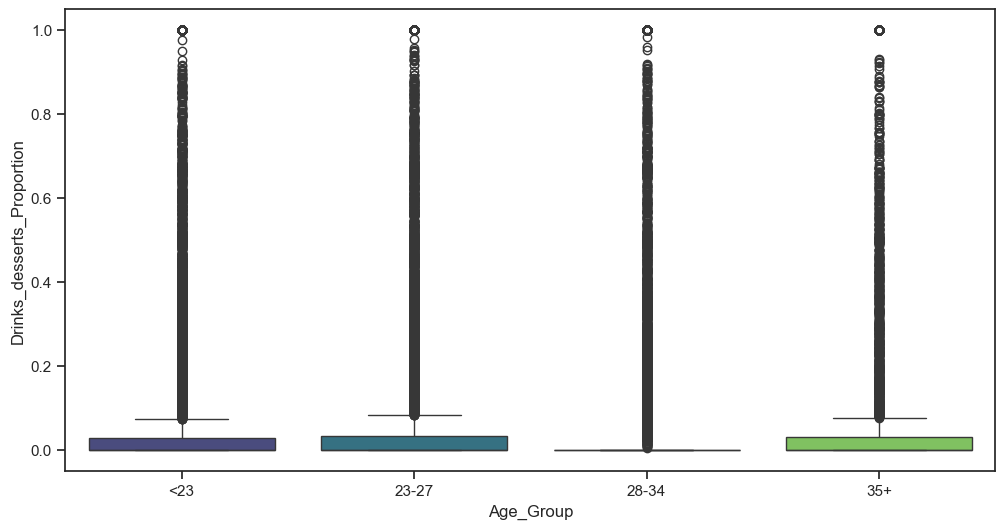

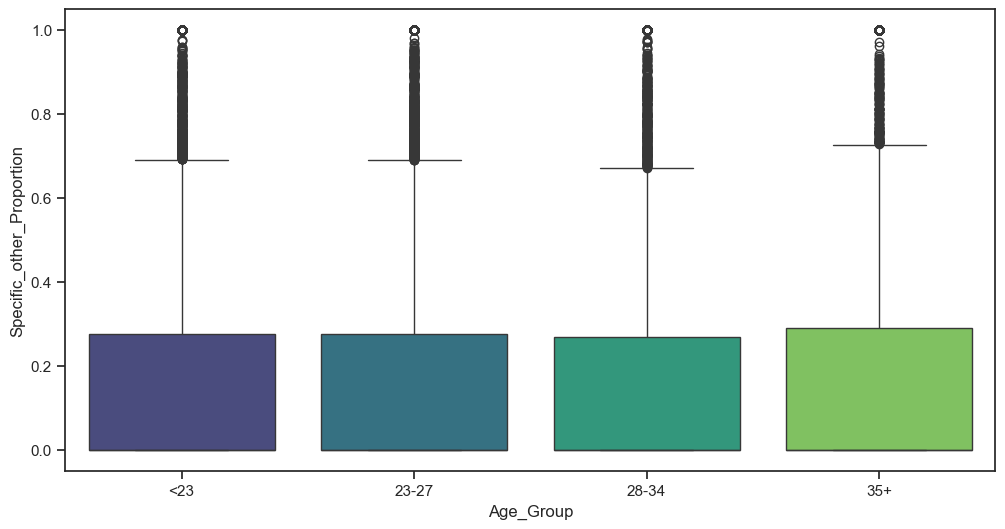

In [72]:
# Plot asian proportion for each age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Asian_Proportion', palette = 'viridis')
# Plot western proportion for each age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Western_Proportion', palette = 'viridis')
# Plot drinks and desserts proportion for each age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Drinks_desserts_Proportion', palette = 'viridis')
# Plot specific_otjer proportion for each age group
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age_Group', y='Specific_other_Proportion', palette = 'viridis')

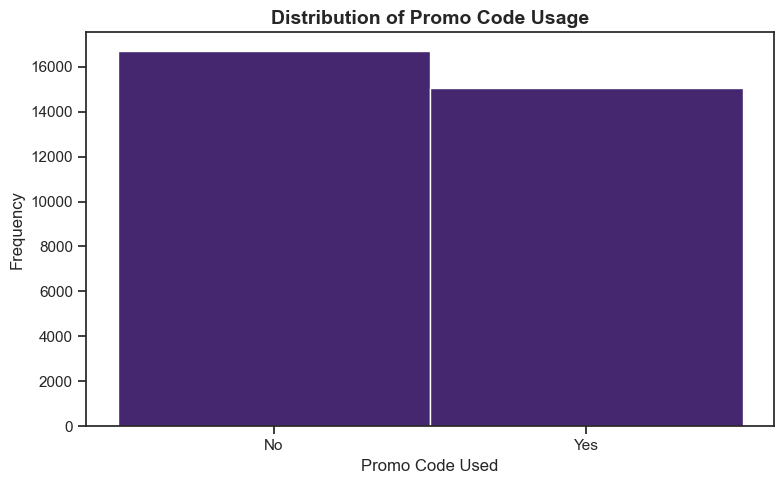

In [73]:
# Histogram of Promo_Code 
# space out the bars for better visibility

plt.figure(figsize=(8, 5))
plt.hist(df['Promo'], bins=2, color='#44276e')
plt.title('Distribution of Promo Code Usage', fontweight='bold', fontsize=14)
plt.xlabel('Promo Code Used', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks([0.25, 0.75], ['No', 'Yes'])
plt.tight_layout()
plt.show()

#### Correlations

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/1977995021.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = corr_metric.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")


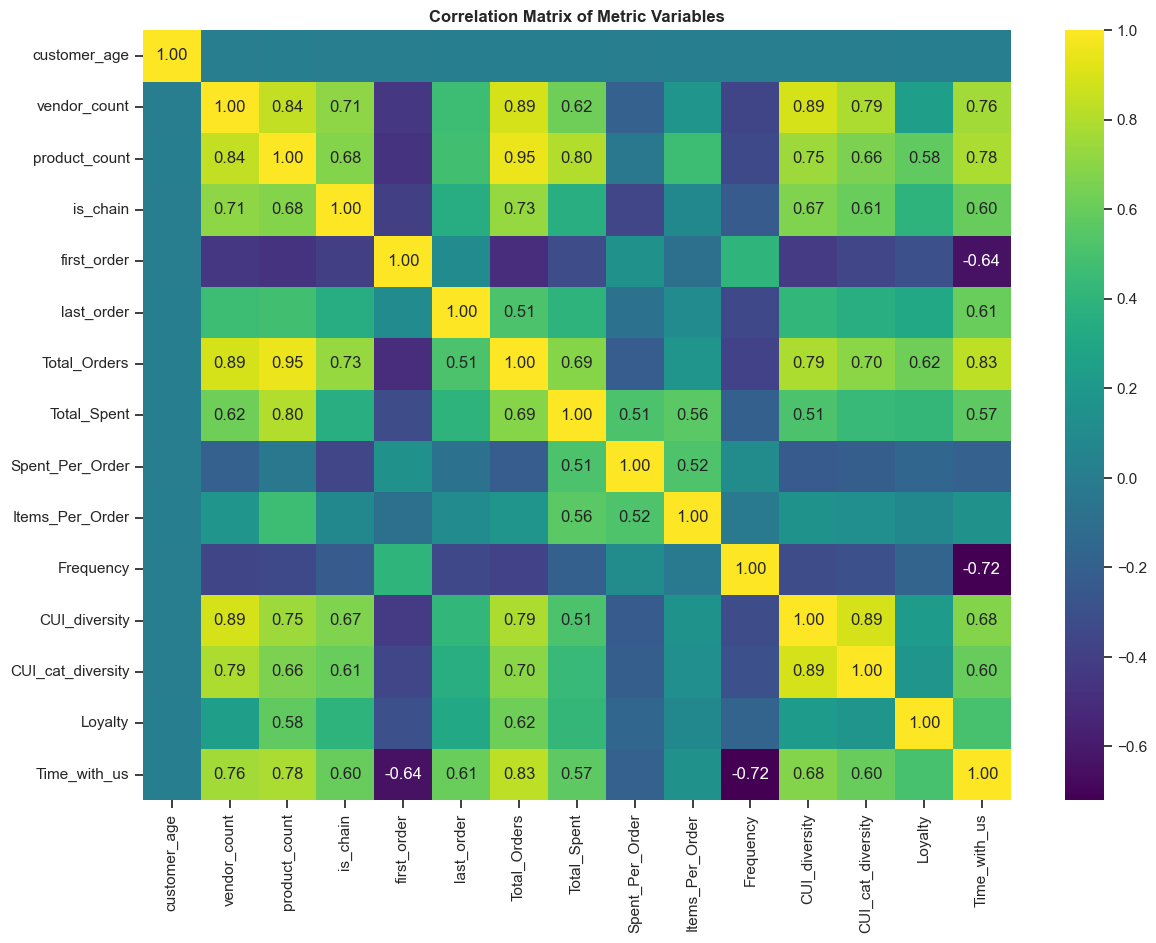

In [74]:
# Calculate the Spearman correlation and round to 2 decimal places
corr_metric = metric_variables.corr(method='spearman').round(2)

# Create a mask for annotations: only show values where abs(correlation) > 0.5
mask = corr_metric.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")

# Plot the heatmap
plt.figure(figsize=(14, 10))
plt.title('Correlation Matrix of Metric Variables', fontsize=12, fontweight='bold')
sns.heatmap(data=corr_metric, annot=mask, cmap=plt.cm.viridis, fmt='')

# Show the plot
plt.show()

- `customer_age` weak correlation with other metric
- `vendor_count` high correlation with `Total_Orders` and `CUI_diversity`
- `product_count` high correlation with `Total_Orders` and `Total_Spent`
- `Time_with_us` high correlation with `Total_Orders`

I will drop:
- `product_count` because it highly correlates with `Total_Spent`, `Total_Orders`, and `vendor_count`
- `Total_Orders` because it highly correlates with `vendor_count`

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/3342572979.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = times_corr.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")


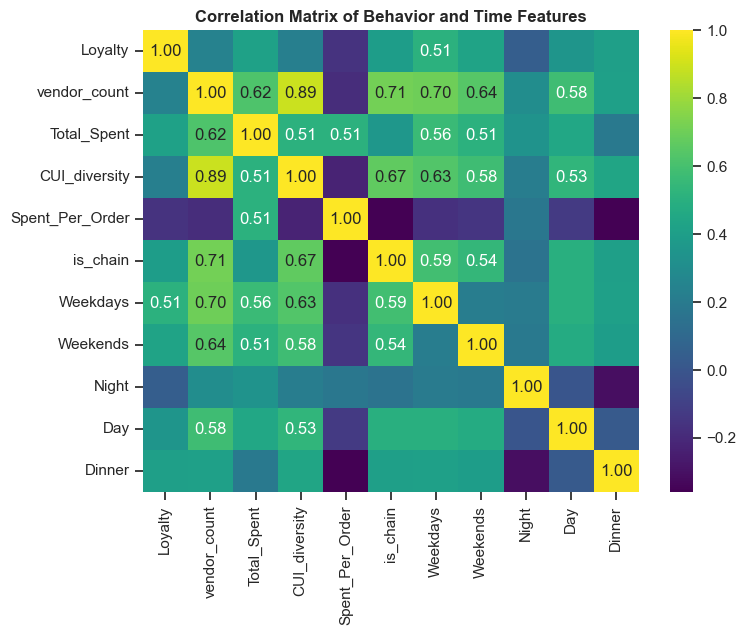

In [75]:
# Calculate Spearman correlation
times_corr = df[['Loyalty', 'vendor_count','Total_Spent', 'CUI_diversity', 'Spent_Per_Order', 'is_chain','Weekdays', 'Weekends',  'Night', 'Day', "Dinner"]].corr(method='spearman').round(2)

# Create a mask for annotations: only show values where abs(correlation) > 0.5
mask = times_corr.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix of Behavior and Time Features', fontsize=12, fontweight='bold')
sns.heatmap(data=times_corr, annot=mask, cmap=plt.cm.viridis, fmt='')

# Show the plot
plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/2747015202.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = spearman_corr1.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")


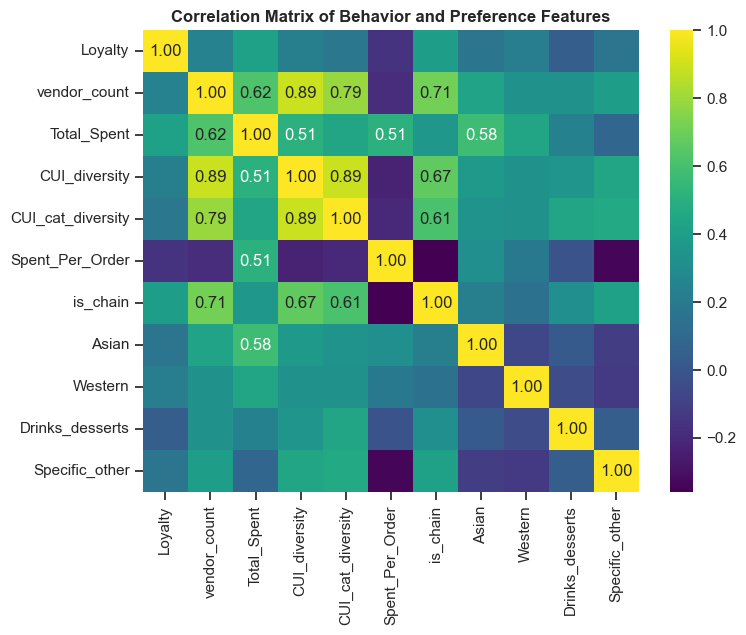

In [76]:
spearman_corr1 = df[['Loyalty', 'vendor_count','Total_Spent', 'CUI_diversity','CUI_cat_diversity', 'Spent_Per_Order', 'is_chain', 'Asian','Western','Drinks_desserts','Specific_other']].corr(method='spearman').round(2)

# Create a mask for annotations: only show values where abs(correlation) > 0.5
mask = spearman_corr1.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix of Behavior and Preference Features', fontsize=12, fontweight='bold')
sns.heatmap(data=spearman_corr1, annot=mask, cmap=plt.cm.viridis, fmt='')

# Show the plot
plt.show()

- Customers ordering from `Western_Other` and `is_chain` are more loyal to their vendors

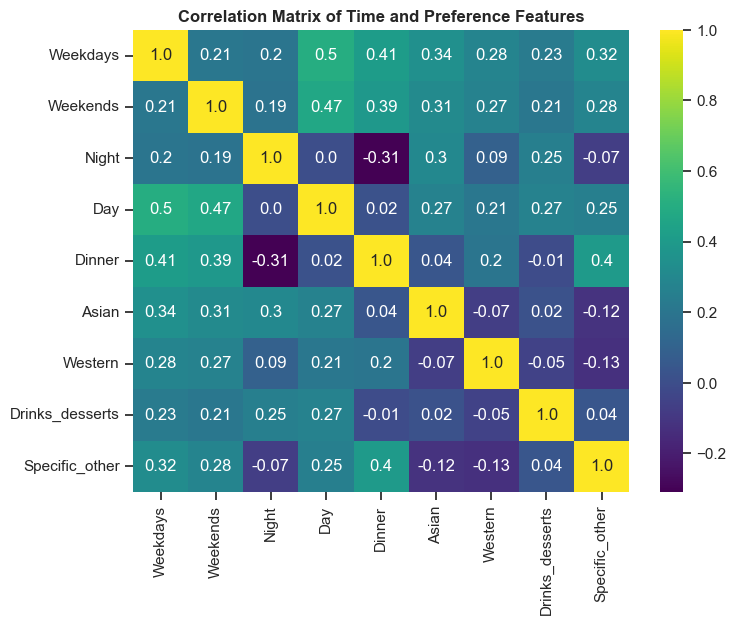

In [77]:
spearman_corr = df[['Weekdays', 'Weekends', 'Night', 'Day', 'Dinner', 'Asian', 'Western', 'Drinks_desserts', 'Specific_other']].corr(method='spearman').round(2)
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix of Time and Preference Features', fontsize=12, fontweight='bold')
sns.heatmap(data=spearman_corr, annot=True, cmap=plt.cm.viridis, fmt='')

# Show the plot
plt.show()

/var/folders/1v/g732xzmj3fq2t8__lcdf8r_40000gn/T/ipykernel_25992/2910595684.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = spearman_corr4.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")


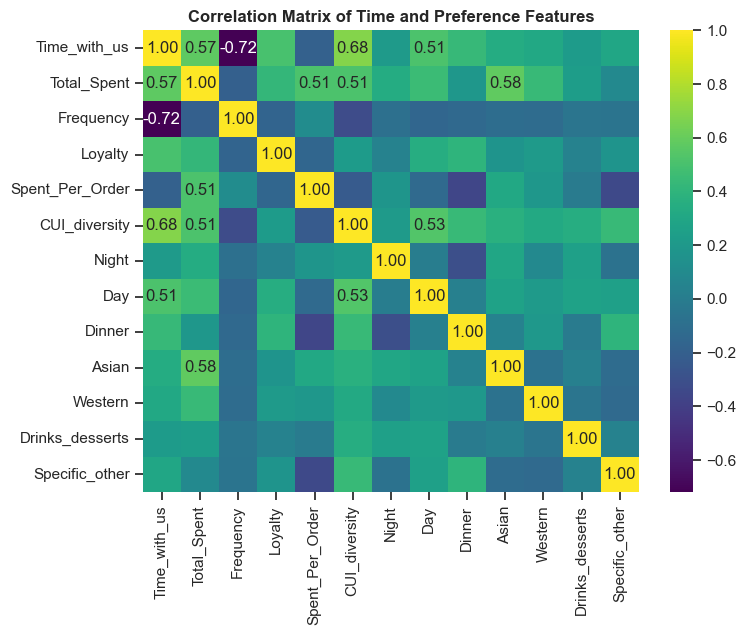

In [78]:
spearman_corr4 = df[['Time_with_us', 'Total_Spent', 'Frequency', 'Loyalty', 'Spent_Per_Order','CUI_diversity','Night', 'Day', 'Dinner', 'Asian', 'Western', 'Drinks_desserts', 'Specific_other']].corr(method='spearman').round(2)

# Create a mask for annotations: only show values where abs(correlation) > 0.5
mask = spearman_corr4.applymap(lambda x: f"{x:.2f}" if abs(x) > 0.5 else "")
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation Matrix of Time and Preference Features', fontsize=12, fontweight='bold')
sns.heatmap(data=spearman_corr4, annot=mask, cmap=plt.cm.viridis, fmt='')

# Show the plot
plt.show()

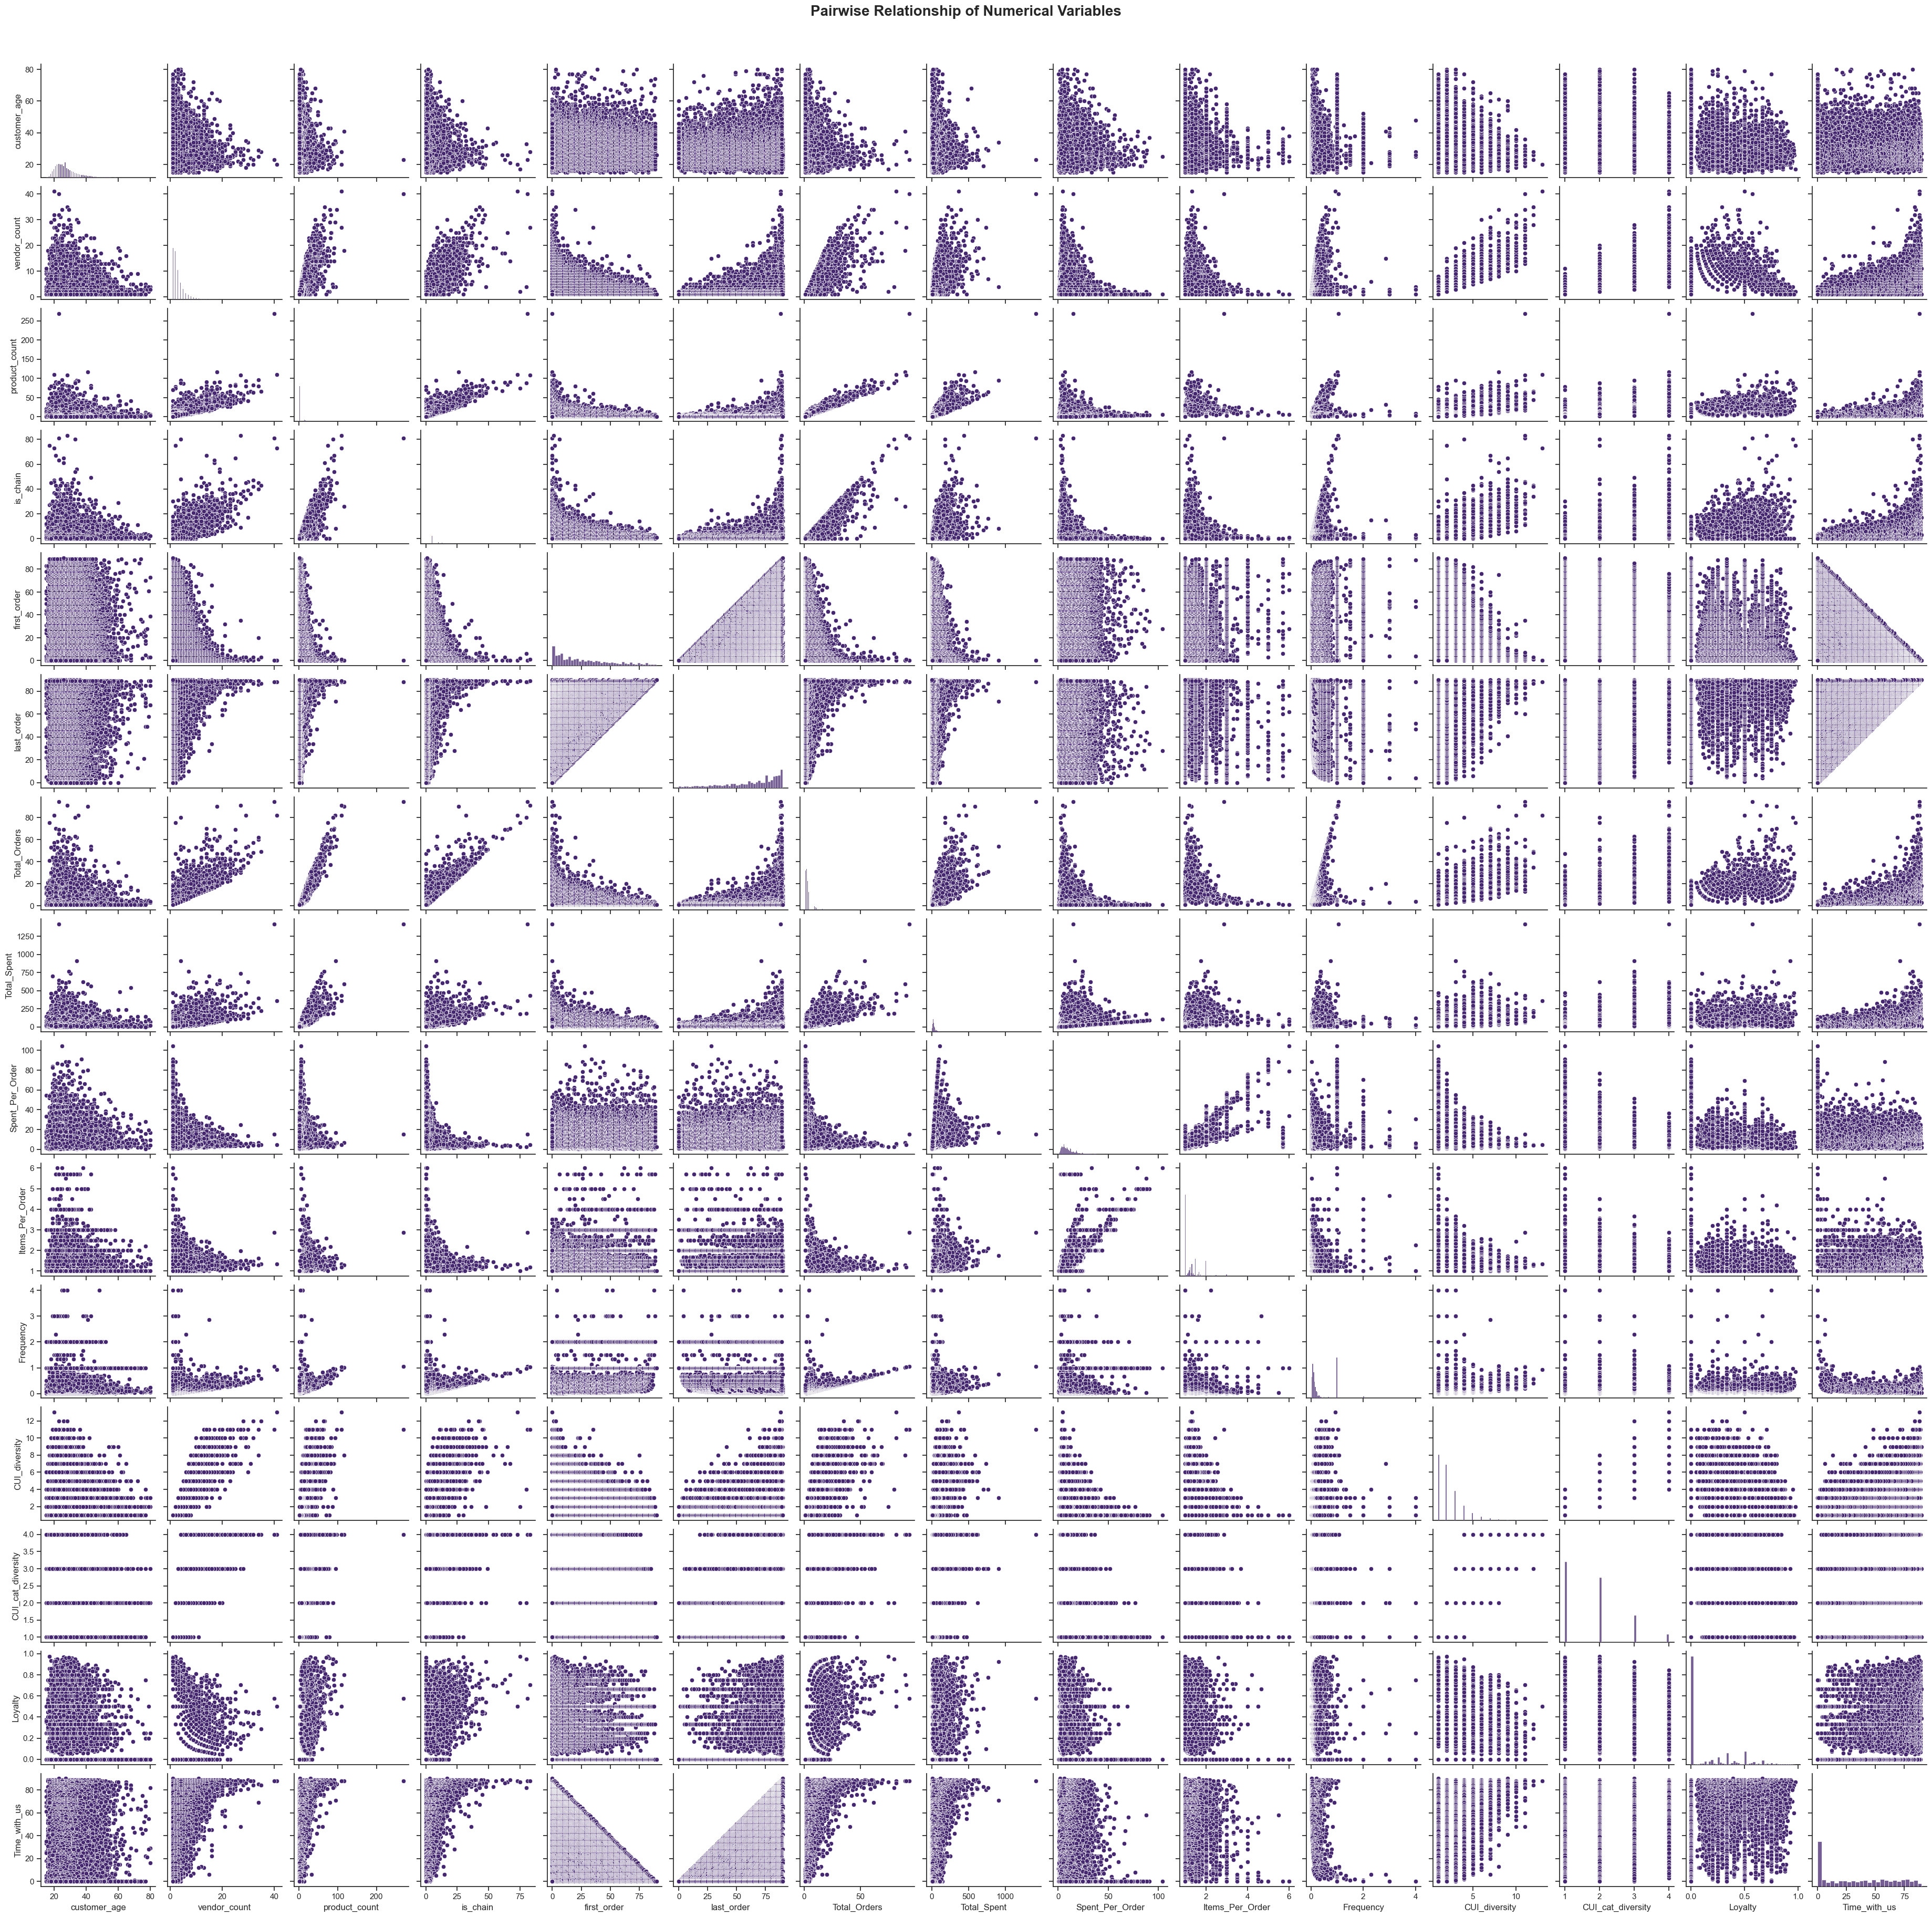

In [79]:
# Setting pairplot
sns.pairplot(metric_variables, diag_kind="hist", plot_kws={'color': '#44276e'},diag_kws={'color': '#44276e'})

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20, fontweight='bold')

plt.show()

<hr>
<a class="anchor" id="trans">
    
# 5. Feature Tranformations
    
</a>

In [80]:
df.columns, df.shape

(Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
        'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
        'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
        'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
        'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
        'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
        'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
        'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
        'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
        'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Orders',
        'Total_Spent', 'Spent_Per_Order', 'Items_Per_Order', 'Frequency',
        'Loyalty', 'Time_with_us', 'CUI_diversity', 'Night', 'Day', 'Dinner',
        'Weekdays', 'Weekends', 'Age_Group', 'Asian', 'Western',
        'Drinks_desserts', 'Specif

In [81]:
# define columns to be skipped during pre-processing
columns_to_drop = ['customer_region', 'last_promo', 'payment_method', 'Age_Group',
                   'DOW_0', 'DOW_1','DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 
                   'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 
                   'HR_7', 'HR_8', 'HR_9', 'HR_10','HR_11', 'HR_12', 'HR_13', 
                   'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
                   'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23',
                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
                   'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
                   'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
                   'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
                   'Asian_Proportion','Western_Proportion', 'Drinks_desserts_Proportion', 'Specific_other_Proportion']
# pick all columns except the categorical ones
cols_to_process = df.drop(columns = columns_to_drop)

In [82]:
cols_to_process.shape

(31737, 25)

<hr>
<a class="anchor" id="outliers">
    
## 5.1 Outliers

In [83]:
# Define function for outlier detection, based on IQR method
def detect_outliers(df,features, dfoutput=False, info=True):
    """
    Detect outliers in the DataFrame based on the InterQuartile Range (IQR) method.

    Args:
        df (pd.DataFrame): The DataFrame to detect the outliers.
        features (list): The list of features to detect the outliers.
        dfoutput (bool, optional): Boolean to return the DataFrame with the outliers. Defaults to False.
        info (bool, optional): Boolean to print the information about the outliers. Defaults to True.

    Returns:
        pd.DataFrame: DataFrame with the outliers (if dfoutput=True).
        pd.DataFrame: Information about the outliers (if info=True and dfoutput=False or info=True and dfoutput=True).
    """
    # Check if features is a list
    if not isinstance(features, list):
        features = [features]
    
    if len(features) == 0:
        return []
    
    # Detect outliers in 1 features
    for feature in features:
        Q1 = df[feature].quantile(0.25)       # 1st quartile
        Q3 = df[feature].quantile(0.75)       # 3rd quartile
        IQR = Q3 - Q1                         # InterQuartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
        
        # Print the information about the outliers
        if info:
            # Save the information that are printed in a DataFrame format
            outliers_info = pd.DataFrame({
                'Feature': feature,
                '1st Quartile': Q1,
                '3rd Quartile': Q3,
                'IQR': IQR,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Number of Outliers': len(outliers),
                'Percentage of Outliers (%)': round(len(outliers)/len(df)*100, 2),
                'Min': outliers[feature].min(),
                'Max': outliers[feature].max()
            }, index=[0])
            
            # Return the DataFrame with the information about the outliers
            return outliers_info
            
        # Return DataFrame with the outliers and the information about the outliers
        if dfoutput:
            return outliers_info, outliers

In [84]:
# Apply the function 'detect_outliers' to all the columns
for col in cols_to_process.columns:
    # If it is the first column, save the information about the outliers
    if col == cols_to_process.columns[0]:
        outliers_info = detect_outliers(cols_to_process, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info = pd.concat([outliers_info, detect_outliers(cols_to_process, col, info=True)], ignore_index=True)
    
outliers_info.set_index('Feature', inplace=True)

# Filter the DataFrame to only show the columns that have outliers
outliers_info = outliers_info[outliers_info['Number of Outliers'] > 0]

# Personalize the DataFrame with a grey color for the rows without outliers
def highlight_no_outliers(row):
    # Check if the "Number of Outliers" column is zero
    if row['Number of Outliers'] > 0:
        return ['background-color: #DEEBF7'] * len(row)
    return [''] * len(row)

# Apply styling to the DataFrame
outliers_info.style.format({
    col: '{:.2f}' for col in outliers_info.select_dtypes('float64').columns
}).apply(highlight_no_outliers, axis=1)

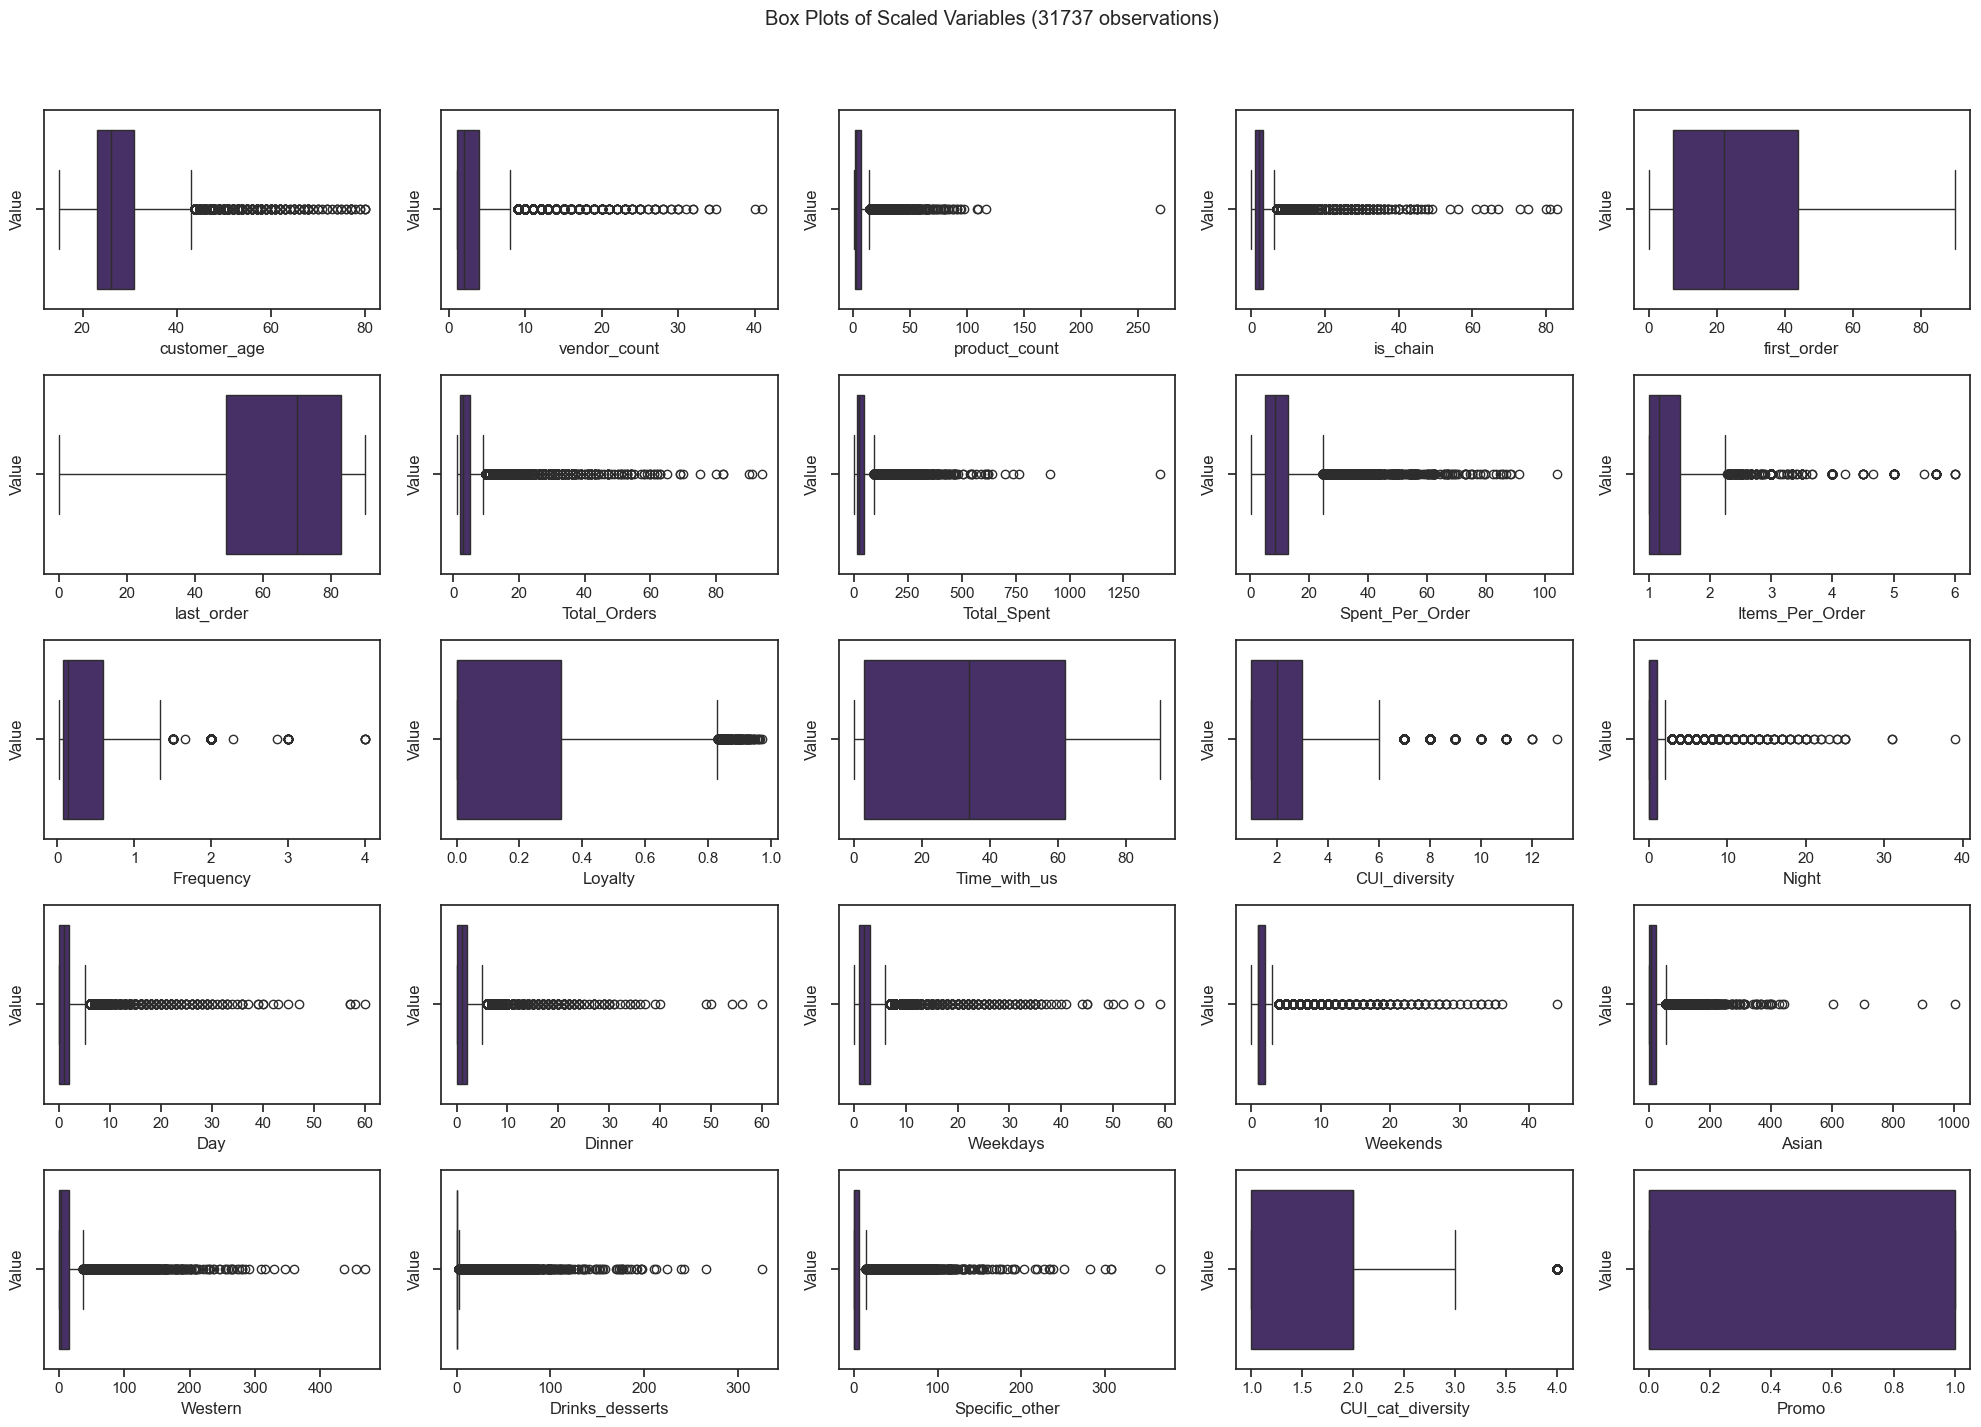

In [85]:
sns.set(style = 'ticks')

fig, axes = plt.subplots(5,5, figsize=(20, 15))

columns_to_plot = cols_to_process.columns

for ax, feat in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(x=cols_to_process[feat], ax=ax, color = '#44276e')
    ax.set_xlabel(feat)
    ax.set_ylabel('Value')

title = f"Box Plots of Scaled Variables ({cols_to_process.shape[0]} observations)"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 Note: It appears that many features have outliers on the upper end (beyond the upper whiskers of the boxplots)<br>
The upper whisker ends either at: <br>
1. The largest value within Q3+1.5*IQR, or <br>
2. The maximum value in the dataset if no values exceed this threshold. <br>
    
Based on this observation, I decided to categorize all the observations falling **above** that threshold to be outliers. <br>
I decided for winsorization instead of truncation to keep and treat the abnormal values. We assume these observations are real values and we don't want to remove them. <br>

All the features but 3(`last_order`, `first_order`, `Time_with_us`) have outliers. For 5 features (`Breakfast`, `Weekends`, `Fast_food`, `Chicken_pasta`, `Drinks_snacks`, and `Healthy_other`) more than 10% of the values are outliers.

Since all the features are right skewed, I will only winsorize the upper end


In [86]:
no_outliers = ['last_order', 'first_order', 'Time_with_us']
features_to_win = cols_to_process.drop(columns = no_outliers)

In [87]:
# Winsorization Function that only winsorizes the upper bound
def winsorize_upper(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    # Compute the upper whisker
    upper_bound = q3 + (1.5 * iqr)
    # Apply trimming only above the upper whisker
    data[data > upper_bound] = upper_bound
    return np.where(data > upper_bound, upper_bound, data)  # Cap values above the upper bound

In [88]:
# Apply winsorization
for col in features_to_win:
    cols_to_process[col] = winsorize_upper(cols_to_process[col].values)

# check the results
for col in cols_to_process.columns:
    # If it is the first column, save the information about the outliers
    if col == cols_to_process.columns[0]:
        outliers_info = detect_outliers(cols_to_process, col, info=True)
    else:
        # Combine the information about the outliers of all the columns in a single DataFrame
        outliers_info = pd.concat([outliers_info, detect_outliers(cols_to_process, col, info=True)], ignore_index=True)
    
outliers_info.set_index('Feature', inplace=True)

In [89]:
# Filter the DataFrame to only show the columns that have outliers
outliers_info = outliers_info[outliers_info['Number of Outliers'] > 0]

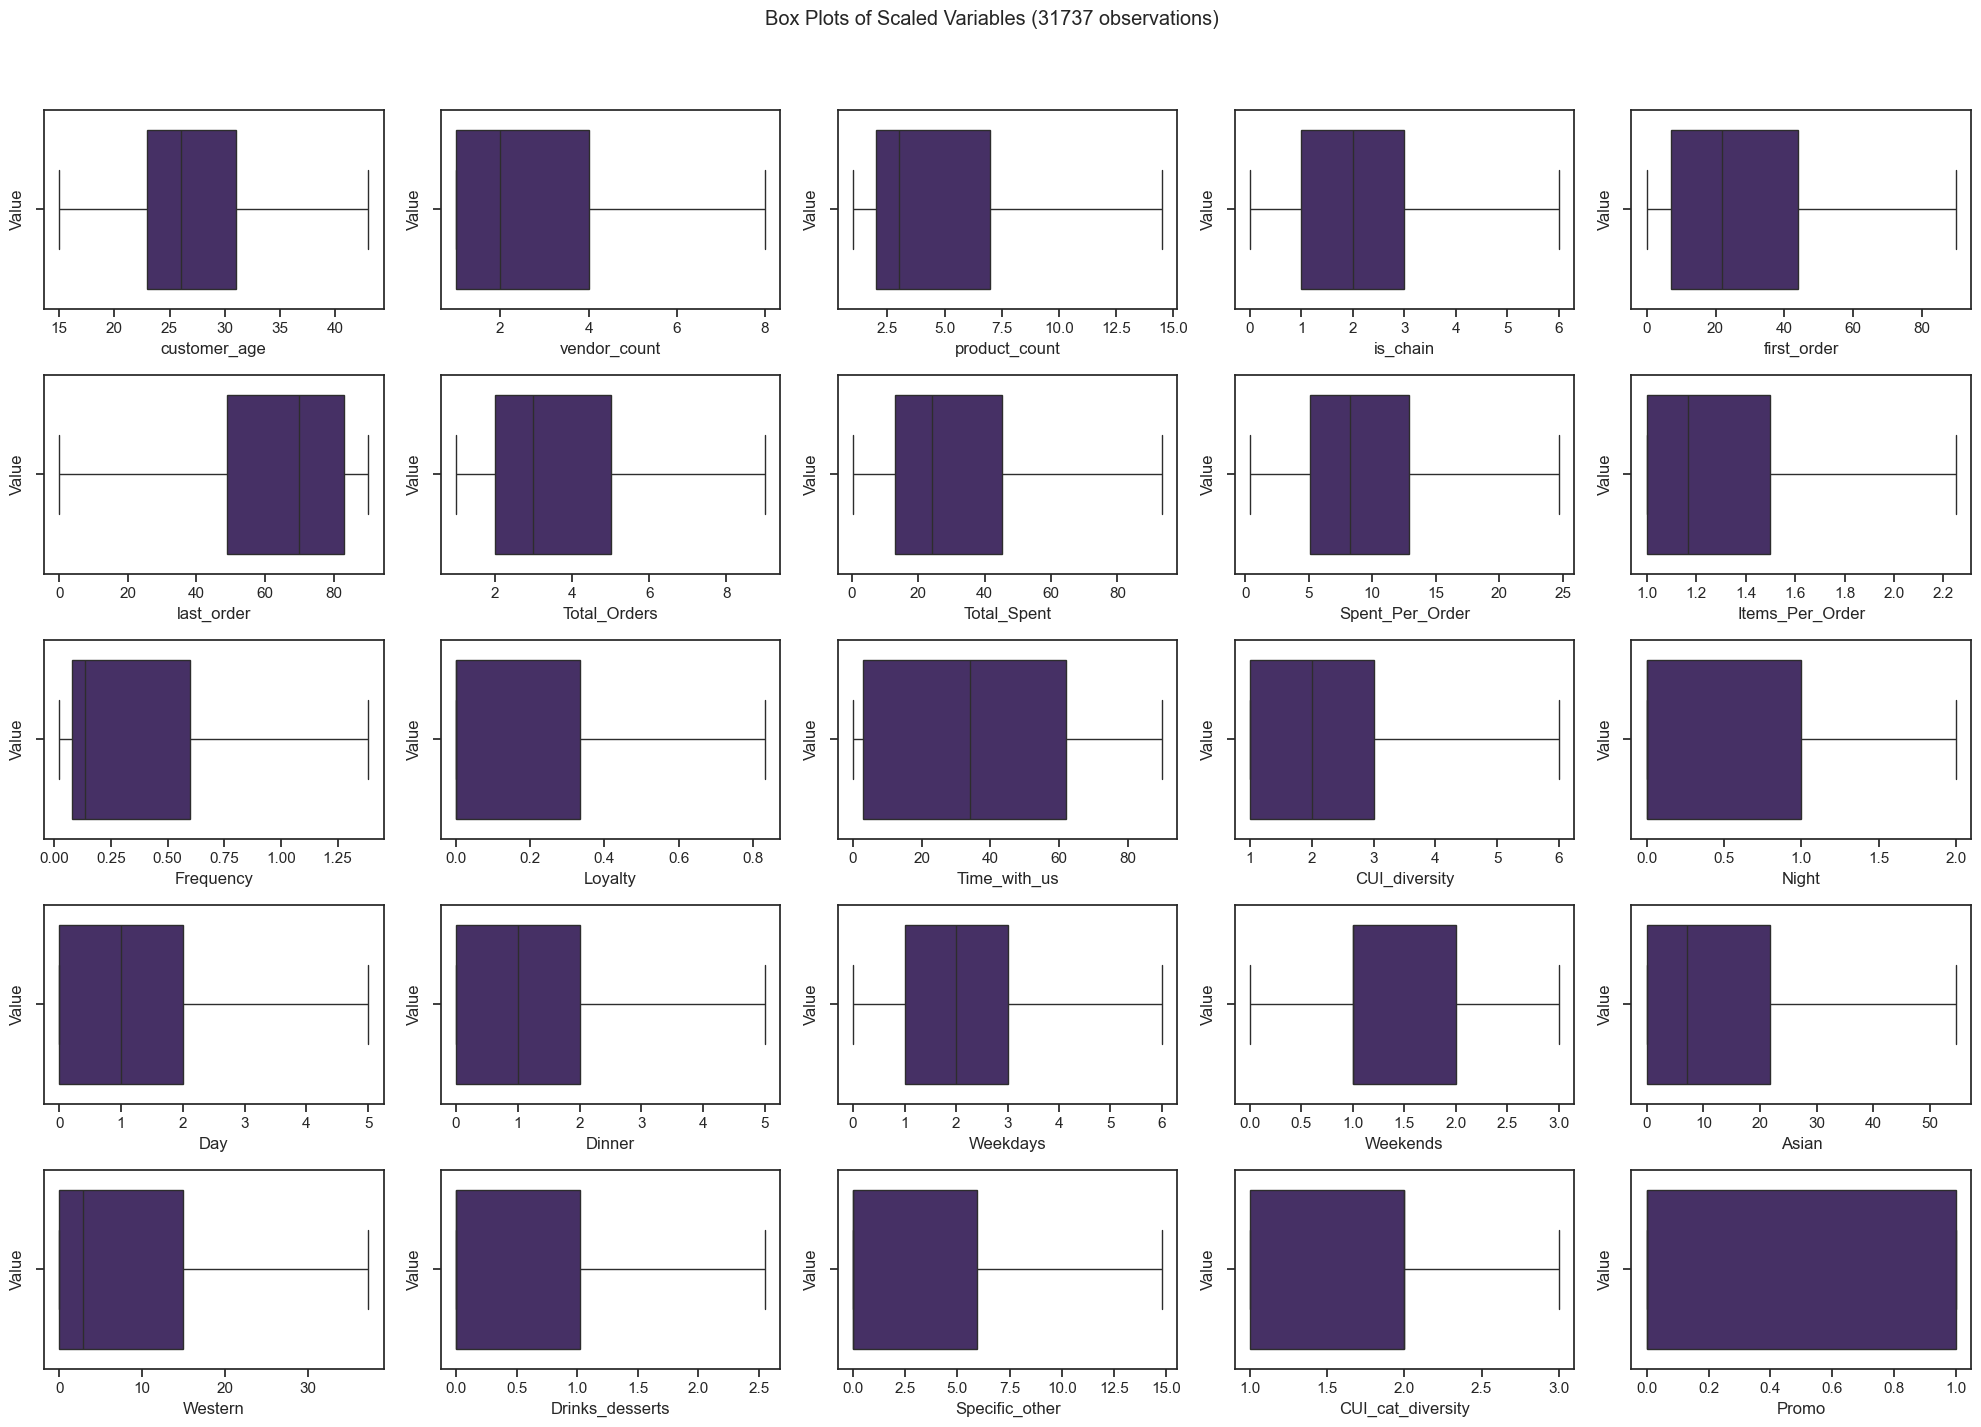

In [90]:
sns.set(style = 'ticks')

fig, axes = plt.subplots(5,5, figsize=(20, 15))

columns_to_plot = cols_to_process.columns

for ax, feat in zip(axes.flatten(), columns_to_plot):
    sns.boxplot(x=cols_to_process[feat], ax=ax, color = '#44276e')
    ax.set_xlabel(feat)
    ax.set_ylabel('Value')

title = f"Box Plots of Scaled Variables ({cols_to_process.shape[0]} observations)"
plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<hr>
<a class="anchor" id="scaling">
    
## 5.2 Scaling

In [91]:
# Apply MinMaxScaler to the columns
scaler = MinMaxScaler()
cols_to_process = pd.DataFrame(scaler.fit_transform(cols_to_process), columns=cols_to_process.columns)

In [92]:
cols_to_process.describe(include = 'all').T

count      mean       std  min       25%       50%  \
customer_age       31737.0  0.437768  0.224305  0.0  0.285714  0.392857   
vendor_count       31737.0  0.274083  0.290831  0.0  0.000000  0.142857   
product_count      31737.0  0.294255  0.297584  0.0  0.074074  0.148148   
is_chain           31737.0  0.375482  0.325380  0.0  0.166667  0.333333   
first_order        31737.0  0.314494  0.267650  0.0  0.077778  0.244444   
last_order         31737.0  0.708389  0.257577  0.0  0.544444  0.777778   
Total_Orders       31737.0  0.335866  0.326569  0.0  0.125000  0.250000   
Total_Spent        31737.0  0.353543  0.287330  0.0  0.135948  0.256099   
Spent_Per_Order    31737.0  0.389488  0.255806  0.0  0.193217  0.322713   
Items_Per_Order    31737.0  0.227071  0.280613  0.0  0.000000  0.133333   
Frequency          31737.0  0.239033  0.286394  0.0  0.040151  0.082286   
Loyalty            31737.0  0.193878  0.274595  0.0  0.000000  0.000000   
Time_with_us       31737.0  0.393896  0.326766  0.0  0.033333  0.377778   
CUI_diversity      31737.0  0.249608  0.270109  0.0  0.000000  0.200000   
Night              31737.0  0.262013  0.385916  0.0  0.000000  0.000000   
Day                31737.0  0.302171  0.319295  0.0  0.000000  0.200000   
Dinner             31737.0  0.286757  0.328614  0.0  0.000000  0.200000   
Weekdays           31737.0  0.348379  0.307825  0.0  0.166667  0.333333   
Weekends           31737.0  0.476195  0.367286  0.0  0.333333  0.333333   
Asian              31737.0  0.256773  0.310609  0.0  0.000000  0.130160   
Western            31737.0  0.249882  0.333295  0.0  0.000000  0.077748   
Drinks_desserts    31737.0  0.244941  0.425030  0.0  0.000000  0.000000   
Specific_other     31737.0  0.227675  0.363391  0.0  0.000000  0.000000   
CUI_cat_diversity  31737.0  0.373287  0.379170  0.0  0.000000  0.500000   
Promo              31737.0  0.474021  0.499332  0.0  0.000000  0.000000   

                        75%  max  
customer_age       0.571429  1.0  
vendor_count       0.428571  1.0  
product_count      0.444444  1.0  
is_chain           0.500000  1.0  
first_order        0.488889  1.0  
last_order         0.922222  1.0  
Total_Orders       0.500000  1.0  
Total_Spent        0.481569  1.0  
Spent_Per_Order    0.515930  1.0  
Items_Per_Order    0.400000  1.0  
Frequency          0.424090  1.0  
Loyalty            0.400000  1.0  
Time_with_us       0.688889  1.0  
CUI_diversity      0.400000  1.0  
Night              0.500000  1.0  
Day                0.400000  1.0  
Dinner             0.400000  1.0  
Weekdays           0.500000  1.0  
Weekends           0.666667  1.0  
Asian              0.400000  1.0  
Western            0.400000  1.0  
Drinks_desserts    0.400000  1.0  
Specific_other     0.400000  1.0  
CUI_cat_diversity  0.500000  1.0  
Promo              1.000000  1.0

<hr>
<a class="anchor" id="savedata">
    
# 6. Save the Clean Data
    
</a>

**Concatenate columns**

In [93]:
df[columns_to_drop].shape, cols_to_process.shape

((31737, 54), (31737, 25))

In [94]:
# Concatenate cleaned and uncleaned DataFrames along the columns
clean_df = pd.concat([cols_to_process, df[columns_to_drop]], axis=1)

# check the shape of the new DataFrame
clean_df.shape

(31737, 79)

In [95]:
# define columns to drop for clustering purposes
#columns_to_drop = ['customer_region', 'last_promo', 'payment_method', 'Age_Group', # categorical variables that I can't use for clustering
#                   'last_order', 'first_order', # created `Time_with_us` and `Frequency` columns
#                   'DOW_0', 'DOW_1','DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', # created `Weekdays` and `Weekends` columns
#                   'HR_0', 'HR_1', 'HR_2','HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10','HR_11', 'HR_12', 
#                   'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18','HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', # created time periods
#                   'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
#                   'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
#                   'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
#                   'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai', # created cuisine categories
#                   'product_count', # high correlation with 'Total_Spent
#                   'vendor_count', # I will use Loyalty instead
#                   'Total_Orders', # I Time_with_us instead
#                   'Items_Per_Order', #
#                   'CUI_diversity', #
#                   'is_chain'
#                   'Weekdays', 'Weekends' # I will only use 'Night', 'Breakfast', 'Lunch', 'Dinner' columns
                   
#df_clust = df.drop(columns = columns_to_drop)

In [96]:
clean_df.to_csv('datasets/data_clean.csv', index=False)

In [97]:
clean_df.columns, clean_df.shape

(Index(['customer_age', 'vendor_count', 'product_count', 'is_chain',
        'first_order', 'last_order', 'Total_Orders', 'Total_Spent',
        'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'Loyalty',
        'Time_with_us', 'CUI_diversity', 'Night', 'Day', 'Dinner', 'Weekdays',
        'Weekends', 'Asian', 'Western', 'Drinks_desserts', 'Specific_other',
        'CUI_cat_diversity', 'Promo', 'customer_region', 'last_promo',
        'payment_method', 'Age_Group', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3',
        'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4',
        'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12',
        'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20',
        'HR_21', 'HR_22', 'HR_23', 'CUI_American', 'CUI_Asian', 'CUI_Beverages',
        'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
        'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
        'CUI_Noodle_Dishes', 'CUI_OTHER

In [ ]:
features_to_visualize = df['customer_age', 'vendor_count', 'product_count', 'is_chain',
        'first_order', 'last_order', 'Total_Orders', 'Total_Spent',
        'Spent_Per_Order', 'Items_Per_Order', 'Frequency', 'Loyalty',
        'Time_with_us', 'CUI_diversity', 'Night', 'Day', 'Dinner', 'Weekdays',
        'Weekends', 'Asian', 'Western', 'Drinks_desserts', 'Specific_other',
        'CUI_cat_diversity', 'Promo', 'customer_region', 'last_promo',
        'payment_method', 'Age_Group',  'CUI_American', 'CUI_Asian', 'CUI_Beverages',
        'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts',
        'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese',
        'CUI_Noodle_Dishes', 'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai',
        'Asian_Proportion', 'Western_Proportion', 'Drinks_desserts_Proportion',
        'Specific_other_Proportion']